In [1541]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


In [1542]:
# loading data
# df = pd.read_csv(r"Used_car_data\used_car_dataset.csv")
# Read CSV and skip rows with any missing values
df = pd.read_csv(r"Used_car_data\used_car_dataset.csv", na_values=['NA', 'missing', ''])


In [1543]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [1544]:
# Checking Null values
df.isna().sum()

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64

In [1545]:
df.dropna(inplace=True)

In [1546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   object
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


In [1547]:
df.shape

(2105, 6)

In [1548]:
# Checking duplicated
df.duplicated().sum()

92

In [1549]:
# Removing dublicated
df.drop_duplicates(inplace=True)

In [1550]:
df.shape

(2013, 6)

In [1551]:
df.sample(10)

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
1598,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2013-2...,₹ 3.85 Lakh,"42,228 km",Petrol,Delhi,2014
1307,MG ZS EV Exclusive [2020-2021],₹ 19.19 Lakh,"57,946 km",Electric,Bangalore,2020
1336,Renault Triber RXL [2019-2020],₹ 5.39 Lakh,"30,040 km",Petrol,Kolkata,2019
1281,Maruti Suzuki Celerio VXi CNG [2017-2019],₹ 4.68 Lakh,"81,091 km",CNG,Delhi,2018
713,Maruti Suzuki Swift Dzire ZDI AMT,₹ 6.9 Lakh,"69,000 km",Diesel,Ahmedabad,2017
1308,Renault Kwid 1.0 RXL [2017-2019],₹ 3.69 Lakh,"43,361 km",Petrol,Bangalore,2017
1657,Volkswagen Polo Highline1.2L (P),₹ 6.99 Lakh,"39,200 km",Petrol,Bangalore,2016
1333,Renault Captur RXL Petrol,₹ 7.79 Lakh,"99,938 km",Petrol,Bangalore,2018
1569,Maruti Suzuki Ciaz Zeta 1.4 MT,₹ 10.87 Lakh,"19,586 km",Petrol,Pune,2019
1863,Honda City ZX CVT Petrol,₹ 16.06 Lakh,"6,116 km",Petrol,Pune,2022


In [1552]:
cat_columns = df.select_dtypes("object").columns

In [1553]:
for col in cat_columns:
    print(df[col].value_counts())
    print("###############################################")
    print()

car_name
Maruti Suzuki Wagon R 1.0 VXI                 24
Maruti Suzuki Alto 800 Lxi                    20
Maruti Suzuki Wagon R 1.0 LXI CNG             20
Maruti Suzuki Baleno Delta 1.2                17
Honda City V                                  17
                                              ..
Audi Q7 4.2 TDI quattro                        1
Toyota Camry Hybrid [2015-2017]                1
Tata Harrier XZA Plus Dual Tone                1
MG Hector Sharp 1.5 Petrol Turbo Hybrid MT     1
Maruti Suzuki Ciaz VXi+ AT                     1
Name: count, Length: 946, dtype: int64
###############################################

car_price_in_rupees
₹ 4.75 Lakh    23
₹ 6.5 Lakh     20
₹ 4.5 Lakh     18
₹ 4.25 Lakh    18
₹ 6.75 Lakh    18
               ..
₹ 3.78 Lakh     1
₹ 6.18 Lakh     1
₹ 7.23 Lakh     1
₹ 66 Lakh       1
₹ 8.76 Lakh     1
Name: count, Length: 811, dtype: int64
###############################################

kms_driven
45,000 km    16
75,000 km    12
65,000 km    12

In [1554]:
df.sample()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
1134,Skoda Rapid Ambition 1.6 MPI AT,₹ 9.59 Lakh,"54,698 km",Petrol,Delhi,2020


# ***Feature Engineering***

In [1555]:
# Formatting the car price or Target Varibale
 
def price_formatting(price):
    if "." in price:
        pattern = r"\d+.\d+"
        num = re.findall(pattern,price)[0]
        num = float(num) * 100000
    else:
        pattern = r"\d+"
        num = re.findall(pattern,price)[0]
        num = float(num) *100000

    return num

df["car_price_in_rupees"] = df["car_price_in_rupees"].apply(price_formatting)



In [1556]:
df["car_price_in_rupees"].value_counts()

car_price_in_rupees
475000.0     23
650000.0     20
450000.0     18
425000.0     18
675000.0     18
             ..
1099000.0     1
378000.0      1
618000.0      1
723000.0      1
876000.0      1
Name: count, Length: 810, dtype: int64

In [1557]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2013 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             2013 non-null   object 
 1   car_price_in_rupees  2013 non-null   float64
 2   kms_driven           2013 non-null   object 
 3   fuel_type            2013 non-null   object 
 4   city                 2013 non-null   object 
 5   year_of_manufacture  2013 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 110.1+ KB


In [1558]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,445000.0,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,293000.0,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,2249000.0,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,695000.0,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],1200000.0,"11,193 km",Petrol,Kolkata,2019


In [1559]:
def kms_driven_formatting(kms):
    kms = kms.replace(",","")
    pattern = r"\d+"
    kms = re.findall(pattern,kms)[0]
    kms = float(kms)

    return kms


df["kms_driven"] = df["kms_driven"].apply(kms_driven_formatting)

In [1560]:
df.sample(5)

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
495,Hyundai Santro Sportz [2018-2020],526000.0,57588.0,Petrol,Pune,2019
319,Maruti Suzuki Ciaz ZXI+,575000.0,65000.0,Petrol,Thane,2015
390,Maruti Suzuki Ciaz VXi,500000.0,27346.0,Petrol,Kolkata,2016
760,Hyundai Grand i10 Sports Edition 1.1 CRDi,349000.0,52242.0,Diesel,Kolkata,2015
169,Hyundai Elite i20 Asta 1.2 (O) CVT [2019-2020],830000.0,22024.0,Petrol,Thane,2019


In [1561]:
# Extracting features from the Car Name columns
df.car_name.value_counts().tail(60)


car_name
Mahindra XUV300 1.5 W8 (O) [2019-2020]                 1
Tata Tiago Revotron XZ Plus                            1
Tata Tigor Buzz Petrol                                 1
Renault Duster 85 PS Base 4X2 MT Diesel                1
Mercedes-Benz E-Class E 220d Exclusive [2019-2019]     1
Honda City 1.5 S AT                                    1
Audi Q3 35 TDI Premium Plus + Sunroof                  1
Audi Q7 Technology 55 TFSI                             1
Toyota Corolla Altis JS Petrol                         1
Skoda Kodiaq L&K 2.0 TDI 4x4 AT                        1
Skoda Octavia Elegance 1.8 TSI AT                      1
Tata Nexon XZA Plus (S)                                1
Mahindra Thar CRDe 4x4 Non AC                          1
BMW X5 xDrive 30d M Sport                              1
BMW X5 xDrive30d xLine                                 1
Mahindra XUV300 W8 1.5 Diesel                          1
Maruti Suzuki Celerio ZXi AMT ABS                      1
Hyundai Verna 1.6 VTVT

In [1562]:
 # Maruti Suzuki , Honda, Hyundai, Ford, Audi, Volkswagen, Tata, Mahindra, BMW,Toyota,MG,Skoda,Renault,Nissan  Others

def extract_brand_name(name):
    brands = ["Maruti Suzuki", "Honda", "Hyundai", "Ford", "Audi", "Volkswagen", "Tata",
              "Mahindra", "BMW", "Toyota", "MG", "Skoda", "Renault", "Nissan", "Kia",
              "Mercedes", "Jeep"]
    
    for brand in brands:
        if brand in name:
            return brand
    return "Other"


df["brand"] = df["car_name"].apply(extract_brand_name)


In [1563]:
df_new = df[df["brand"] != "Other"]

In [1564]:
df_new.shape

(1939, 7)

In [1565]:
df_new.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,brand
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,445000.0,22402.0,Petrol,Mumbai,2016,Hyundai
1,Maruti Suzuki Alto 800 Lxi,293000.0,10344.0,Petrol,Kolkata,2019,Maruti Suzuki
2,Tata Safari XZ Plus New,2249000.0,12999.0,Diesel,Bangalore,2021,Tata
3,Maruti Suzuki Ciaz ZXI+,695000.0,45000.0,Petrol,Thane,2016,Maruti Suzuki
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],1200000.0,11193.0,Petrol,Kolkata,2019,Jeep


In [1566]:
df.car_name.value_counts().head(30)

car_name
Maruti Suzuki Wagon R 1.0 VXI                         24
Maruti Suzuki Alto 800 Lxi                            20
Maruti Suzuki Wagon R 1.0 LXI CNG                     20
Maruti Suzuki Baleno Delta 1.2                        17
Honda City V                                          17
Honda City VX CVT                                     15
Hyundai Grand i10 Magna 1.2 Kappa VTVT [2013-2016]    15
Hyundai Elite i20 Asta 1.2                            14
Hyundai Creta SX Plus 1.6  Petrol                     14
Maruti Suzuki Swift VXi                               13
Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2020]    13
Hyundai Grand i10 Sports Edition 1.2L Kappa VTVT      12
Maruti Suzuki Swift VXi [2014-2017]                   12
Hyundai Elite i20 Sportz 1.2                          11
Hyundai Verna 1.6 VTVT SX                             11
Maruti Suzuki Wagon R 1.0 VXI AMT                     10
Honda Jazz V Petrol                                   10
Maruti Suzuki Alto 800

In [1567]:
df_new["brand"].value_counts()

brand
Maruti Suzuki    539
Hyundai          417
Honda            220
Toyota            86
Tata              81
Ford              69
Renault           65
Mahindra          64
Mercedes          64
Audi              62
Volkswagen        59
BMW               55
Skoda             45
Kia               39
MG                30
Jeep              26
Nissan            18
Name: count, dtype: int64

In [1568]:
df[df["brand"] == "BMW"]["car_name"].value_counts().head(20)

car_name
BMW X1 sDrive20d xLine                          7
BMW 3 Series 320d Luxury Line                   6
BMW 5 Series 520d Luxury Line [2017-2019]       5
BMW 5 Series 520d M Sport                       3
BMW X1 sDrive20d                                3
BMW X1 sDrive20d Expedition                     3
BMW 3 Series GT 320d Luxury Line [2014-2016]    2
BMW X5 xDrive 30d                               2
BMW 5 Series 520d Luxury Line                   2
BMW 7 Series 730Ld Sedan                        2
BMW X1 sDrive20d M Sport                        1
BMW 5 Series GT 535d                            1
BMW X4 xDrive20d M Sport X [2019-2020]          1
BMW 3 Series 320d Highline Sedan                1
BMW X1 sDrive20i xLine                          1
BMW 3 Series 320d Sport Line                    1
BMW X3 xDrive20d                                1
BMW 7 Series 730Ld                              1
BMW 3 Series 330i M Sport Edition               1
BMW X5 xDrive30d xLine                   

In [1569]:
Maruti_Suzuki = ["Wagon R","Alto", "Baleno","Swift DZire","Swift","S-Presso","Ciaz"]
Hyundai = ["Grand i10", "Elite i20","Creta","Verna","Santro","Eon"]
Honda = ["City","Jazz","Amaze","BR-V","WR-V","Brio"]
Ford = ["EcoSport","Endeavour","Figo", "Aspire" ]
Toyota = ["Corolla","Innova","Fortuner","Urban","Etios","Camry"]
Tata = ["Harrier","Tiago","Nexon EV", "Nexon", "Safari","Hexa"]
Renault = ["Kwid","Duster","Triber" ]
Mahindra = ["XUV500","TUV300","Alturas","Thar","Bolero","Scorpio","XUV300"]
Mercedes = ["CLA 200","E-Class","C-Class","GLE 250"]
Audi = ["A3","A4","A6","Q3","Q7"]
Volkswagen = ["Polo","Vento","Tiguan","Ameo"]
BMW = ["X1","X5","3 Series","5 Series","7 Series"]
Skoda = ["Kodiaq", "Rapid","Octavia", "Superb"]
Kia = ["Sonet","Seltos"]
MG = ["Astor","Hector","Gloster"]
Jeep = ["Compass","Wrangler"]
Nissan = ["Terrano","Magnite"]


In [1570]:
def model_name(name):

    model_name = ["Wagon R","Alto", "Baleno","Swift DZire","Swift","S-Presso","Ciaz","Grand i10","Elite i20","Creta",
                "Verna","Santro","Eon","City","Jazz","Amaze","BR-V","WR-V","Brio","EcoSport","Endeavour","Figo", "Aspire",
                "Corolla","Innova","Fortuner","Urban","Etios","Camry","Harrier","Tiago","Nexon EV", "Nexon", "Safari","Hexa",
                "Kwid","Duster","Triber","XUV500","TUV300","Alturas","Thar","Bolero","Scorpio","XUV300","CLA 200","E-Class",
                "C-Class","GLE 250","A3","A4","A6","Q3","Q7","Polo","Vento","Tiguan","Ameo","X1","X5","3 Series","5 Series","7 Series","Kodiaq", 
                "Rapid","Octavia", "Superb","Sonet","Seltos","Astor","Hector","Gloster","Compass","Wrangler","Terrano","Magnite"]
    for model in model_name:
        if model in name:
            return model
    return "Other"

df_new["model"] = df_new["car_name"].apply(model_name)

In [1571]:
df_new.sample(20)

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,brand,model
915,Audi A8 L 3.0 TDI quattro,2751000.0,45500.0,Diesel,Ahmedabad,2013,Audi,Other
2091,Toyota Corolla Altis VL AT Petrol,1295000.0,65100.0,Petrol,Thane,2018,Toyota,Corolla
956,Maruti Suzuki Vitara Brezza VDi,779000.0,58481.0,Diesel,Pune,2018,Maruti Suzuki,Other
359,Honda City V,845000.0,22500.0,Petrol,Thane,2018,Honda,City
1096,Hyundai Grand i10 Sportz 1.2 Kappa VTVT [2013-...,431000.0,46458.0,Petrol,Pune,2013,Hyundai,Grand i10
1071,Mercedes-Benz C-Class C 220d Progressive [2018...,4600000.0,53841.0,Diesel,Hyderabad,2019,Mercedes,C-Class
1631,Honda Jazz V Petrol,770000.0,17922.0,Petrol,Pune,2019,Honda,Jazz
1365,Hyundai Creta SX Plus 1.6 Petrol,813000.0,27433.0,Petrol,Kolkata,2016,Hyundai,Creta
1575,Renault Kwid Neotech RXL,435000.0,12850.0,Petrol,Mumbai,2020,Renault,Kwid
1336,Renault Triber RXL [2019-2020],539000.0,30040.0,Petrol,Kolkata,2019,Renault,Triber


In [1572]:
df_new["city"].value_counts()

city
Bangalore      231
Thane          231
Mumbai         227
Hyderabad      224
Pune           224
Kolkata        223
Ahmedabad      221
Delhi          173
Chennai         74
Noida           40
Ambattur        17
Thiruvallur     16
Pallikarnai     16
Gurgaon          8
Poonamallee      8
Faridabad        6
Name: count, dtype: int64

In [1573]:
df_new.drop(columns="car_name",inplace=True)

In [1574]:
df_new.shape

(1939, 7)

In [1575]:
df_new.fuel_type.value_counts()

fuel_type
Petrol        1256
Diesel         568
CNG             79
Petrol + 1      18
Electric         9
Diesel + 1       5
Hybrid           2
LPG              2
Name: count, dtype: int64

In [1576]:
df = df_new[(df_new["fuel_type"] != "Petrol + 1") | 
       (df_new["fuel_type"] != "Electric") | 
       (df_new["fuel_type"] != "Diesel + 1") |
       (df_new["fuel_type"] != "Hybrid")|
       (df_new["fuel_type"] != "LPG")]

In [1577]:
df.head()

,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,brand,model
0,445000.0,22402.0,Petrol,Mumbai,2016,Hyundai,Grand i10
1,293000.0,10344.0,Petrol,Kolkata,2019,Maruti Suzuki,Alto
2,2249000.0,12999.0,Diesel,Bangalore,2021,Tata,Safari
3,695000.0,45000.0,Petrol,Thane,2016,Maruti Suzuki,Ciaz
4,1200000.0,11193.0,Petrol,Kolkata,2019,Jeep,Compass


In [1578]:
df.dtypes

car_price_in_rupees    float64
kms_driven             float64
fuel_type               object
city                    object
year_of_manufacture      int64
brand                   object
model                   object
dtype: object

# ***EDA***

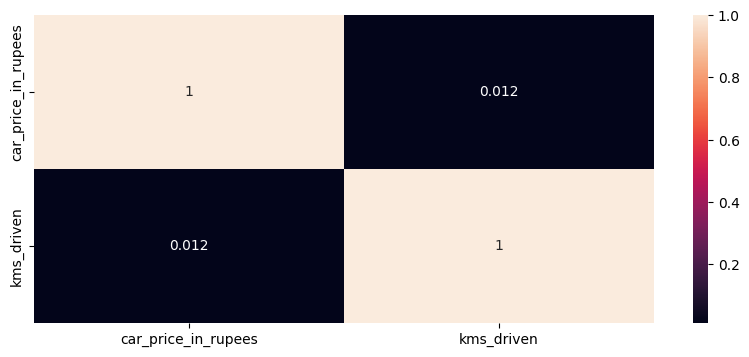

In [1579]:
plt.figure(figsize=(10,4))
sns.heatmap(df[["car_price_in_rupees","kms_driven"]].corr(),annot=True)
plt.show()

In [1580]:
def outlier_check(data,col):
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

        # Histogram with KDE
        sns.histplot(data[col], ax=ax1, kde=True)
        ax1.set_title(f'Histogram with KDE for {col}',fontweight='bold')

        # Boxplot
        sns.boxplot(x=data[col], ax=ax2)
        ax2.set_title(f'Boxplot for {col}',fontweight='bold')

        # Histogram without KDE
        sns.histplot(data[col], ax=ax3, kde=False)
        ax3.set_title(f'Histogram without KDE for {col}',fontweight='bold')

        plt.tight_layout()
        plt.show()

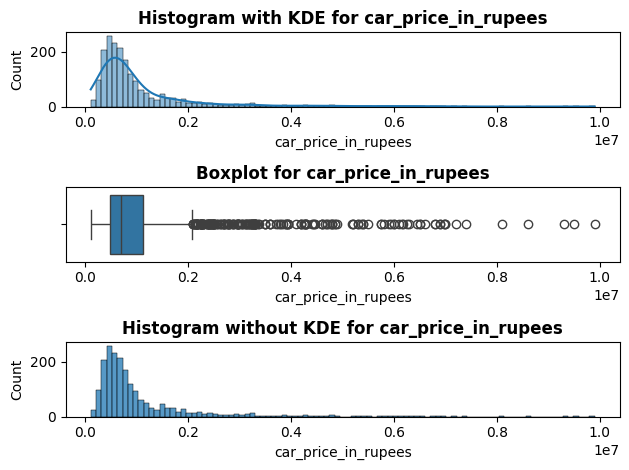

In [1581]:
outlier_check(df,"car_price_in_rupees")

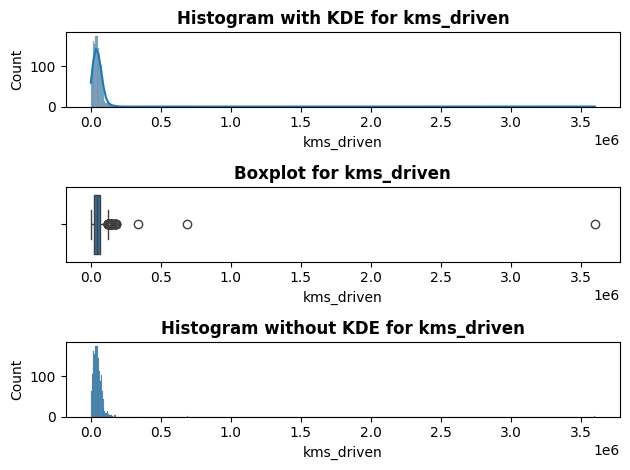

In [1582]:
outlier_check(df,"kms_driven")

In [1583]:
round(df.describe())

,car_price_in_rupees,kms_driven,year_of_manufacture
count,1939.0,1939.0,1939.0
mean,1061170.0,48401.0,2017.0
std,1121343.0,86833.0,3.0
min,110000.0,64.0,2004.0
25%,475000.0,24974.0,2015.0
50%,695000.0,42700.0,2017.0
75%,1121000.0,62848.0,2019.0
max,9900000.0,3600000.0,2022.0


In [1584]:
def remove_outliar(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    ul = Q3 + 1.5*IQR
    ll = Q1 - 1.5*IQR
    df[col] = df[col].clip(ll,ul)

In [1585]:
remove_outliar("car_price_in_rupees")

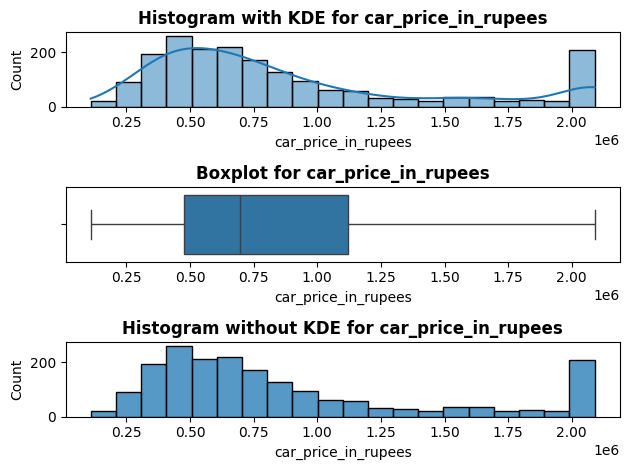

In [1586]:
outlier_check(df,"car_price_in_rupees")

In [1587]:
remove_outliar("kms_driven")

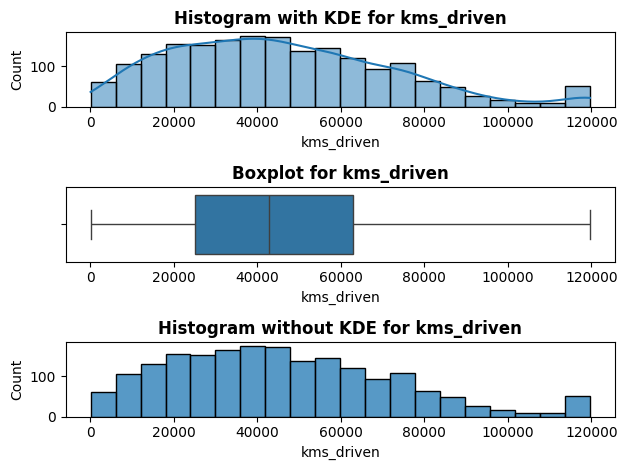

In [1588]:
outlier_check(df,"kms_driven")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


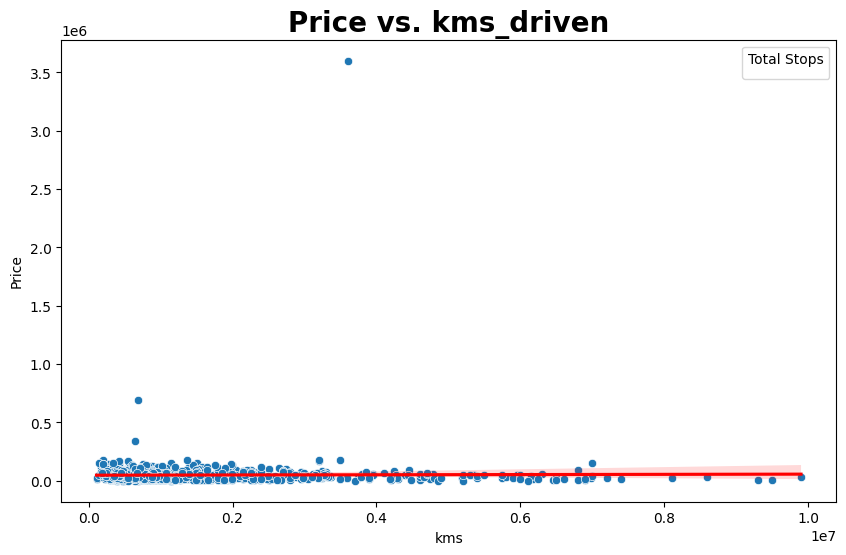

In [1589]:
# Visual representaion As duration is increasing the price is also increasing 

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_new, x="car_price_in_rupees", y="kms_driven", palette="viridis")

# Adding a regression line
sns.regplot(data=df_new, x="car_price_in_rupees", y="kms_driven", scatter=False, color="red")

plt.title("Price vs. kms_driven",fontsize=20,fontweight='bold')
plt.xlabel("kms")
plt.ylabel("Price")
plt.legend(title="Total Stops")

plt.show()

In [1590]:
yearly_price = round(df.groupby("year_of_manufacture")["car_price_in_rupees"].mean())

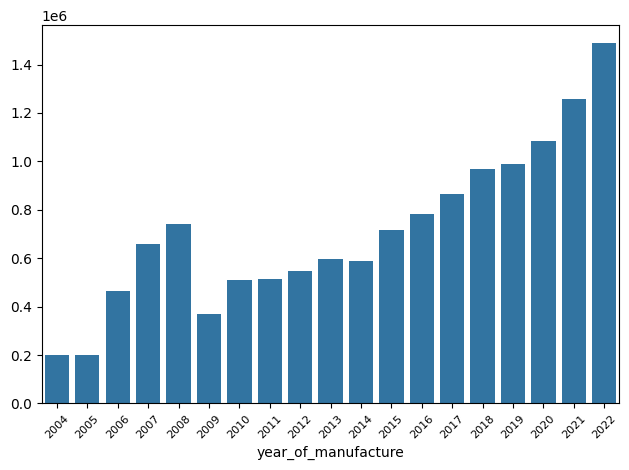

In [1591]:
sns.barplot(x=yearly_price.index,y = yearly_price.values)
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()

In [1592]:
df[df["year_of_manufacture"] == 2007]

,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,brand,model
499,2090000.0,50000.0,Diesel,Pallikarnai,2007,Tata,Other
856,295000.0,119000.0,Petrol + 1,Ambattur,2007,Honda,City
946,450000.0,40206.0,Petrol,Kolkata,2007,Mercedes,E-Class
1133,150000.0,119658.5,Petrol + 1,Ambattur,2007,Maruti Suzuki,Wagon R
1987,300000.0,74000.0,Petrol,Pallikarnai,2007,Hyundai,Santro


In [1593]:
car_brand = round(df.groupby("brand")["car_price_in_rupees"].mean())

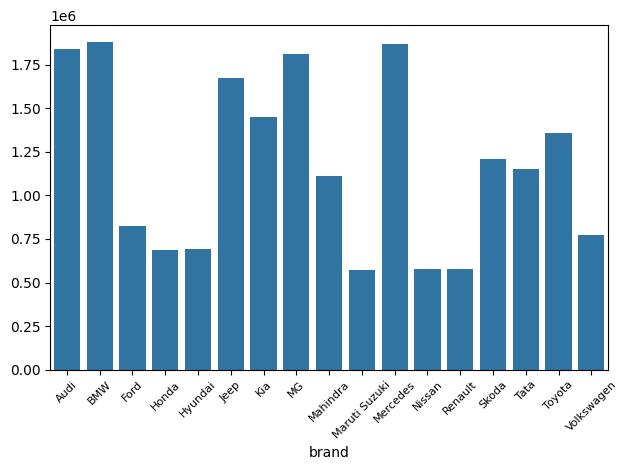

In [1594]:
sns.barplot(x=car_brand.index,y = car_brand.values)
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()

In [1595]:
city_wise = round(df.groupby("city")["car_price_in_rupees"].mean())

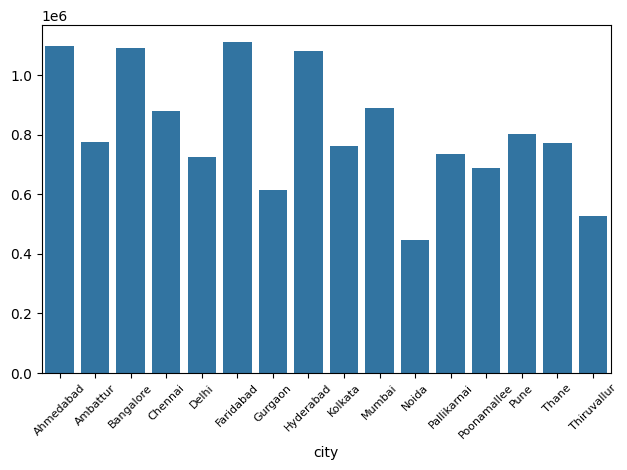

In [1596]:
sns.barplot(x=city_wise.index,y = city_wise.values)
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()

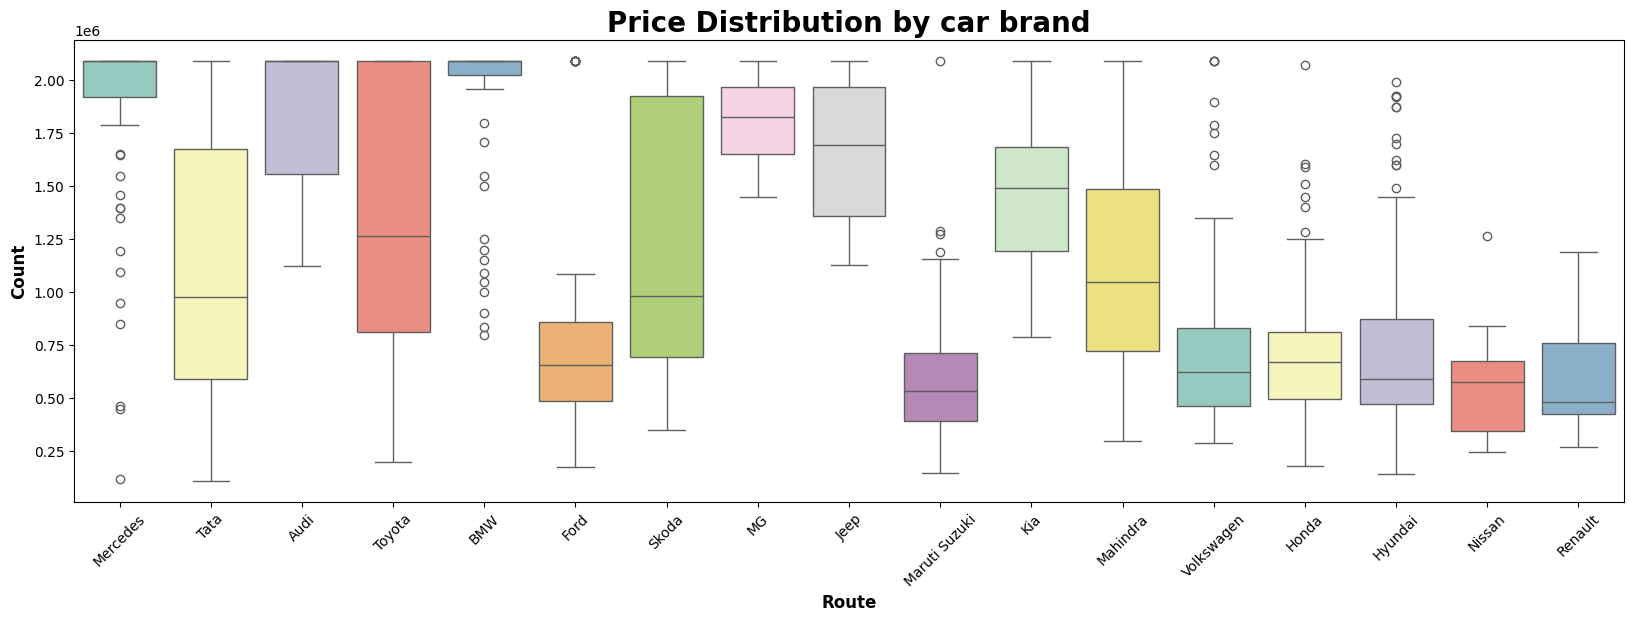

In [1597]:
# Checking the Price distribution by brand

plt.figure(figsize=(20,6))
sns.boxplot(df.sort_values("car_price_in_rupees",ascending=False),y="car_price_in_rupees",x ="brand",palette="Set3")
plt.xticks(rotation = 45)
plt.title("Price Distribution by car brand",fontsize=20,fontweight="bold")
plt.ylabel("Count",fontsize = 12,fontweight = "bold")
plt.xlabel("Route",fontsize = 12,fontweight = "bold")
plt.show()

In [1598]:
brand_maruti = df[df["brand"] == "Maruti Suzuki"]

In [1599]:
brand_maruti

,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,brand,model
1,293000.0,10344.0,Petrol,Kolkata,2019,Maruti Suzuki,Alto
3,695000.0,45000.0,Petrol,Thane,2016,Maruti Suzuki,Ciaz
5,372000.0,42906.0,Petrol,Chennai,2017,Maruti Suzuki,Other
7,1039000.0,13189.0,Petrol,Bangalore,2019,Maruti Suzuki,Other
10,675000.0,60000.0,Diesel,Ahmedabad,2017,Maruti Suzuki,Ciaz
...,...,...,...,...,...,...,...
2090,715000.0,112000.0,CNG,Thane,2014,Maruti Suzuki,Other
2092,647000.0,21477.0,Petrol,Delhi,2019,Maruti Suzuki,Other
2094,180000.0,67181.0,Petrol,Hyderabad,2008,Maruti Suzuki,Alto
2096,550000.0,27563.0,Petrol,Kolkata,2018,Maruti Suzuki,Other


In [1600]:
brand_list = ["Maruti Suzuki","Hyundai","Honda","Ford",
              "Toyota","Tata","Renault","Mahindra","Mercedes","Audi","Volkswagen",
              "BMW","Skoda","Kia","MG","Jeep","Nissan"]

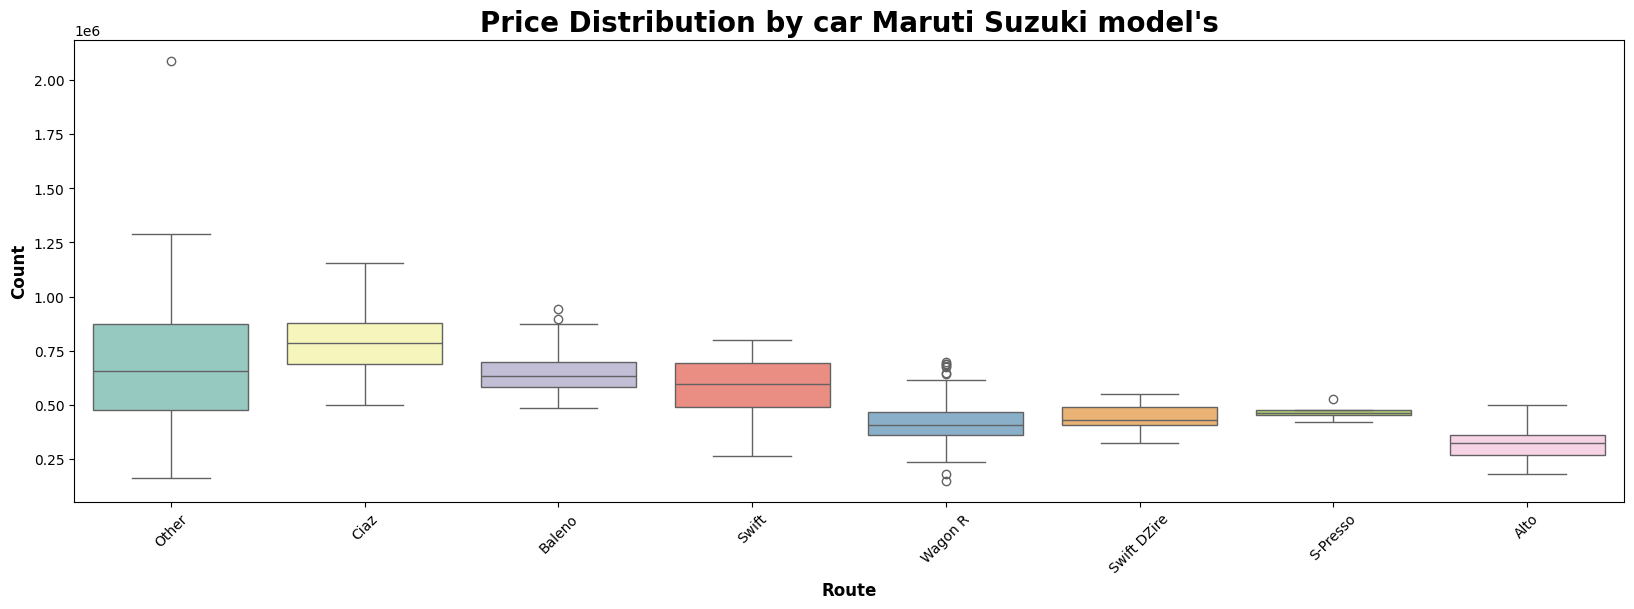

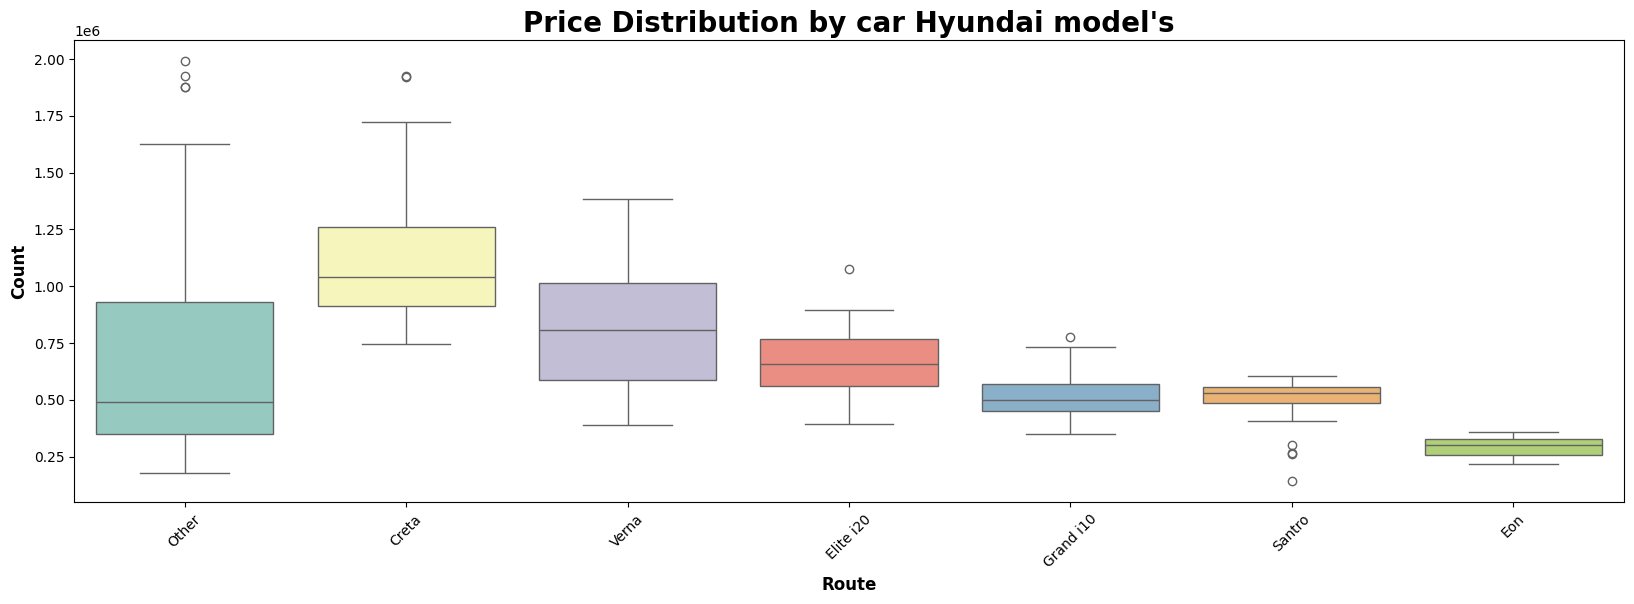

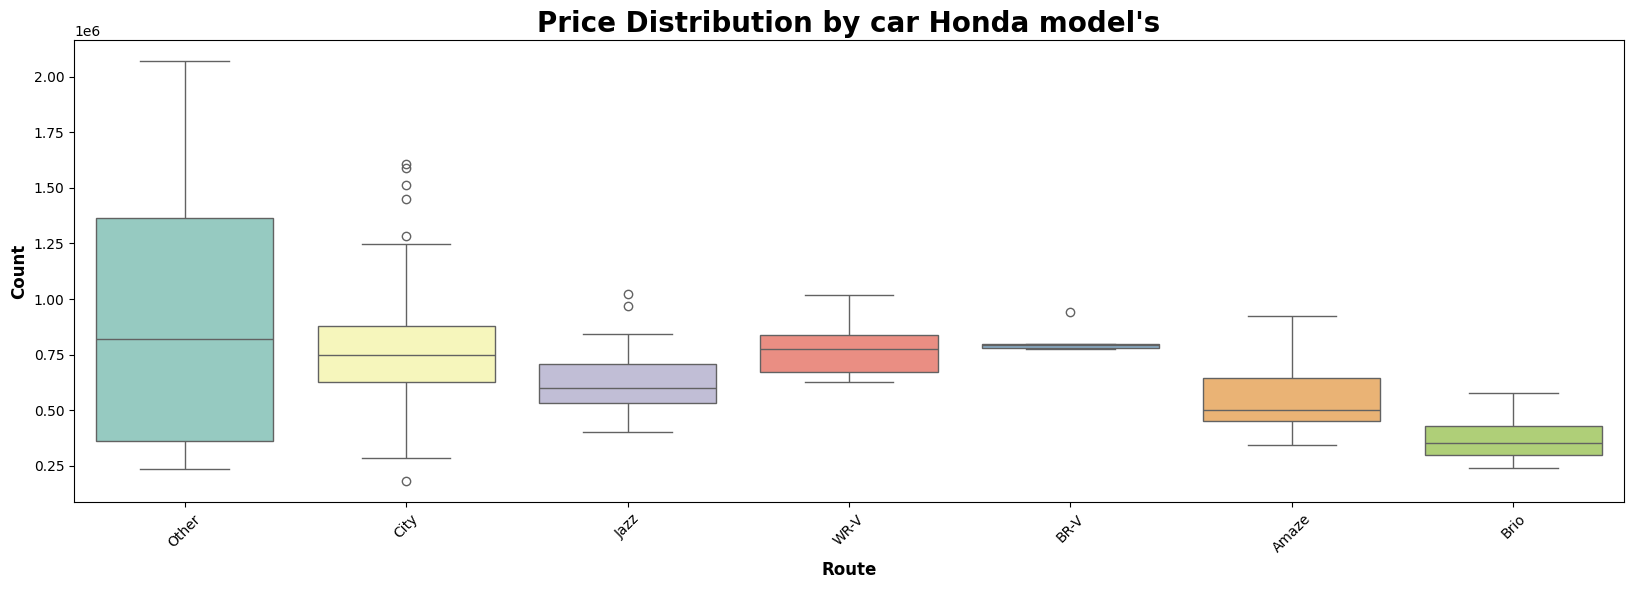

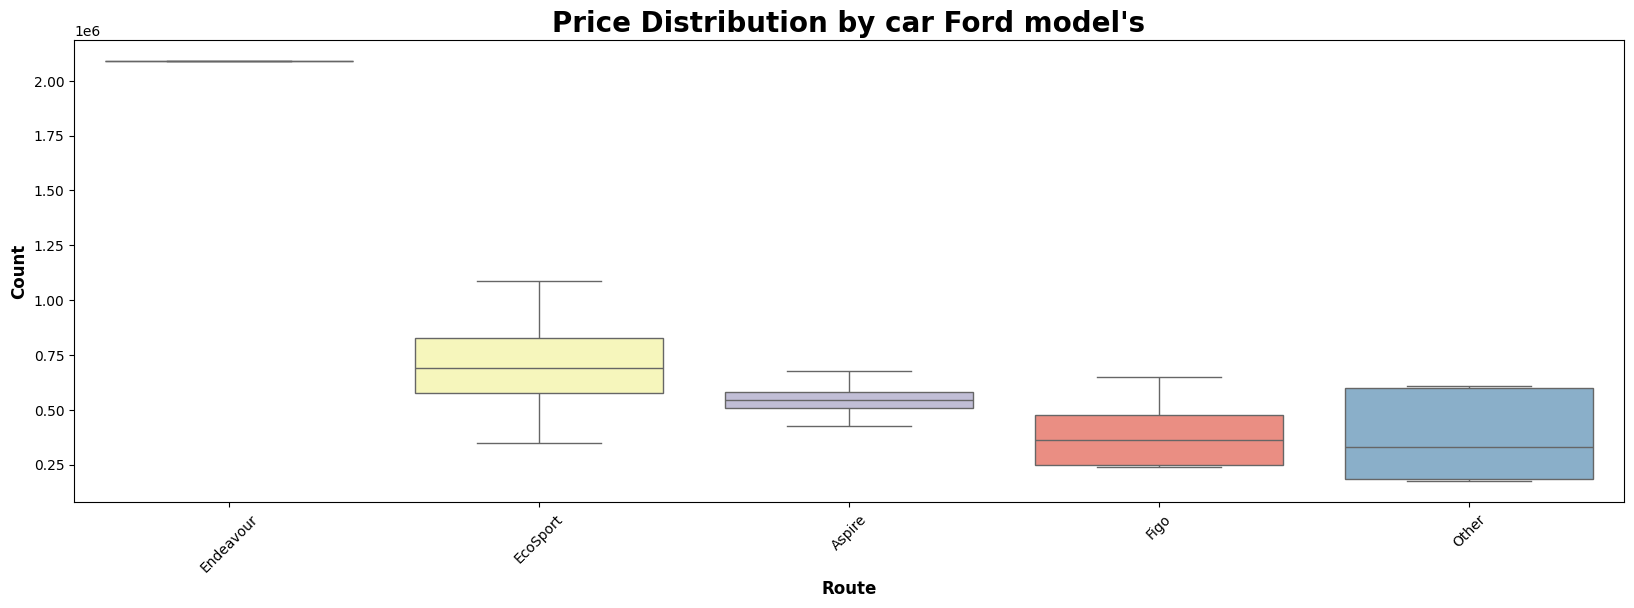

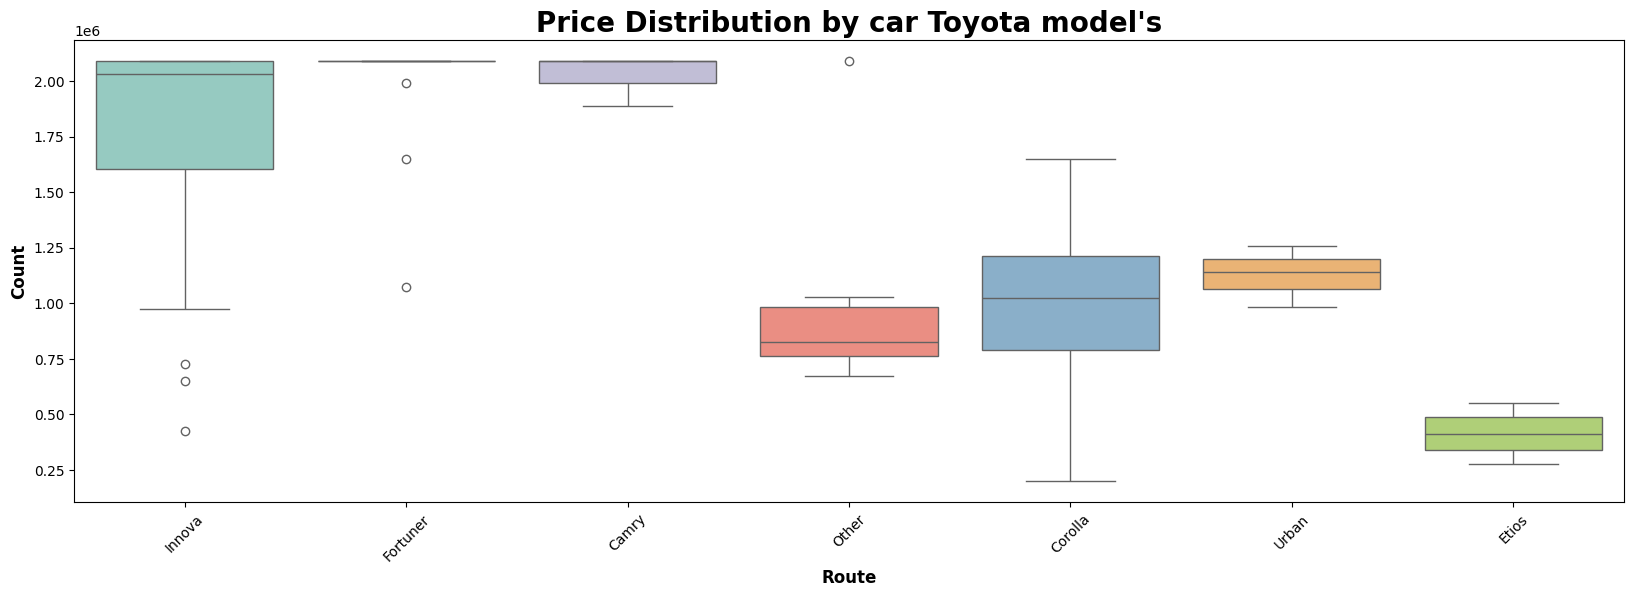

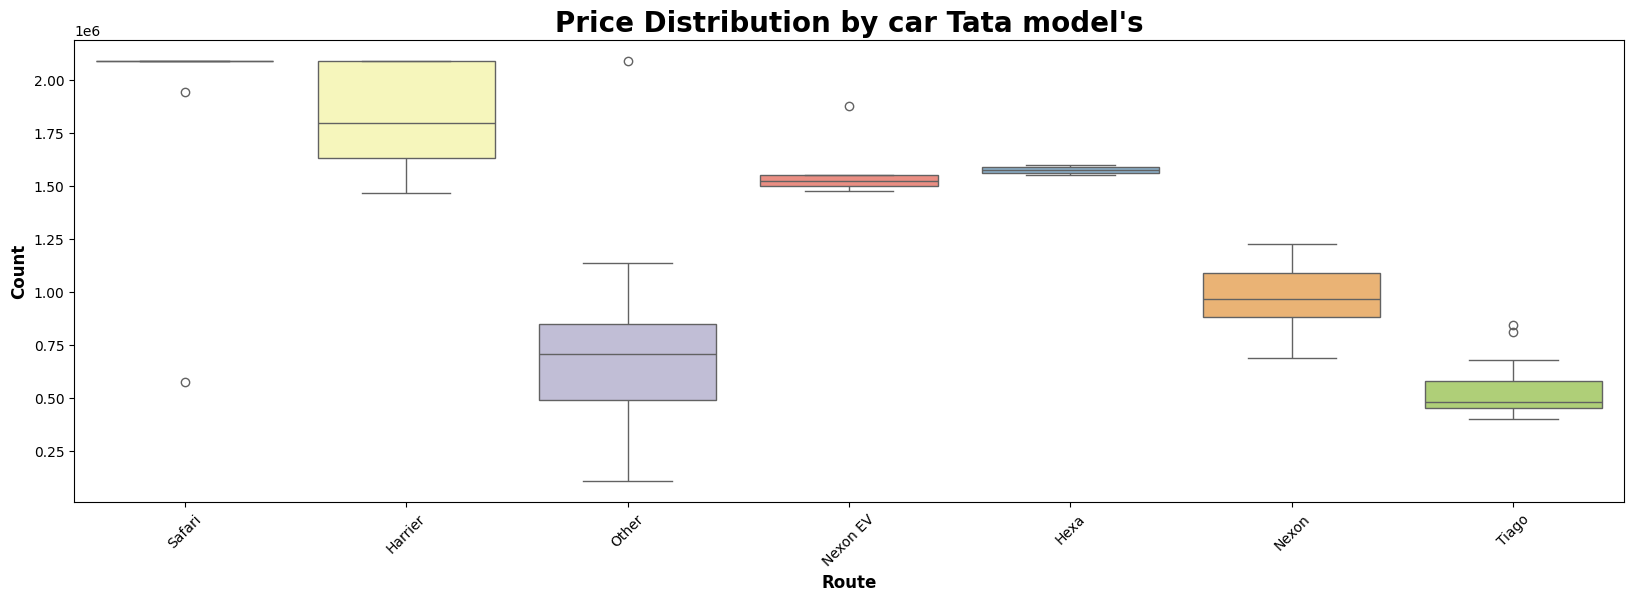

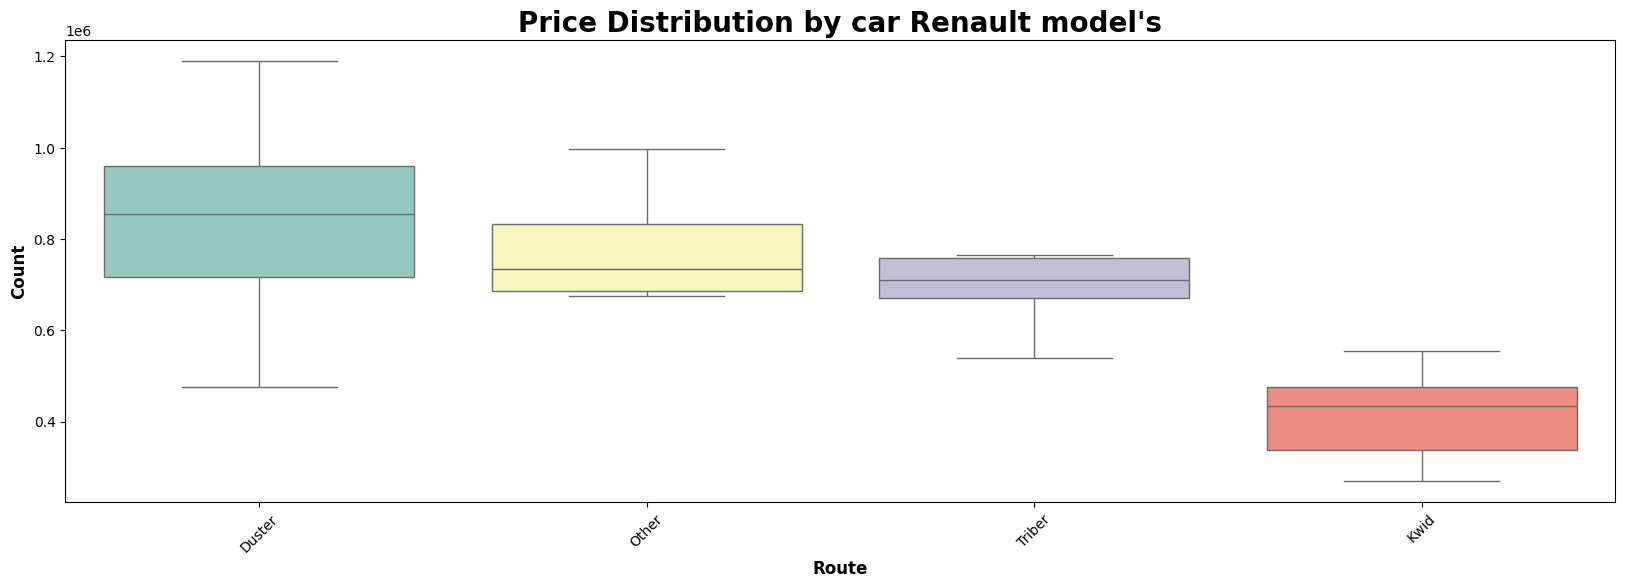

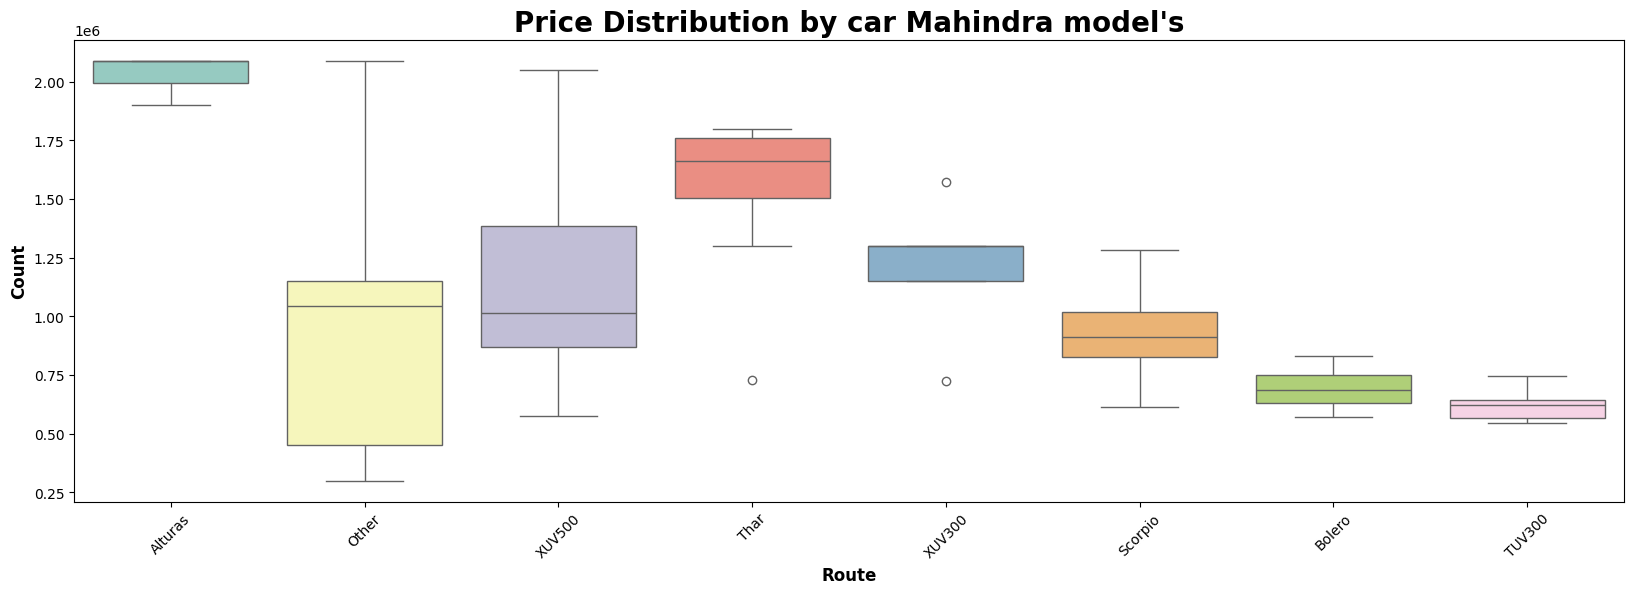

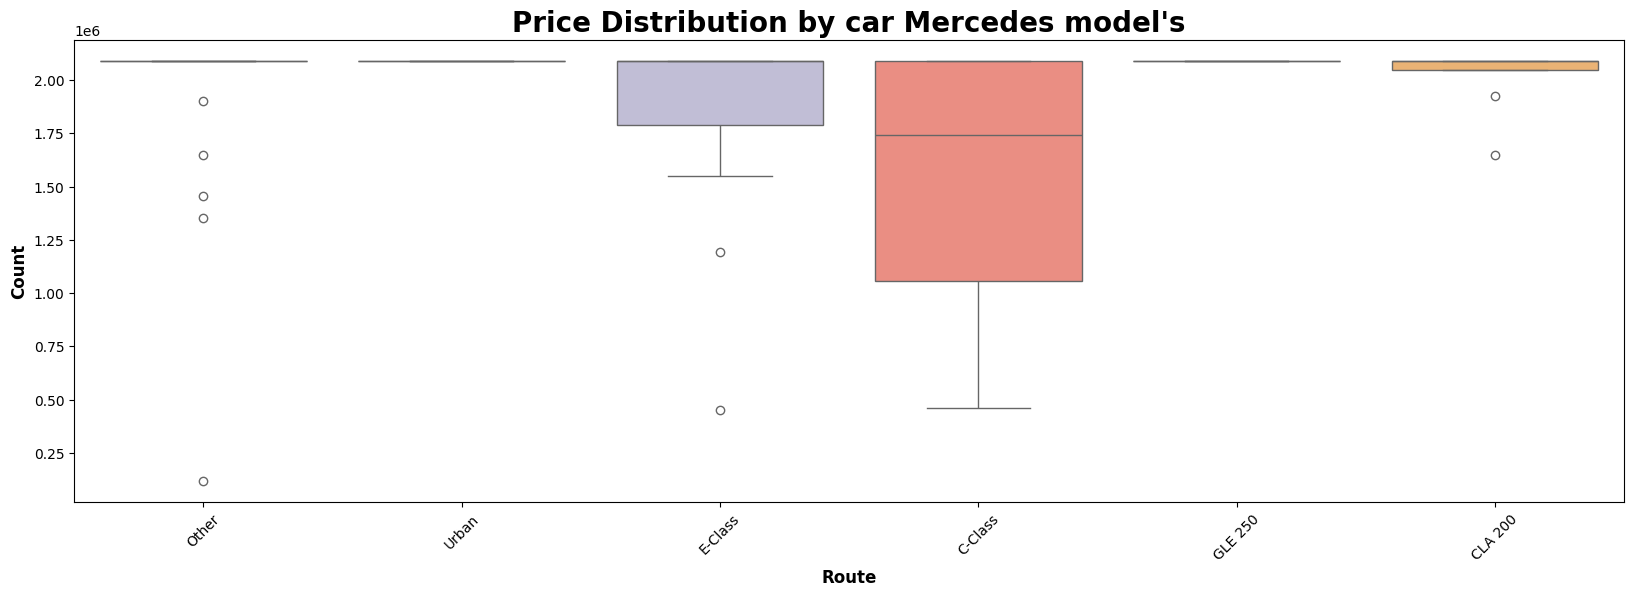

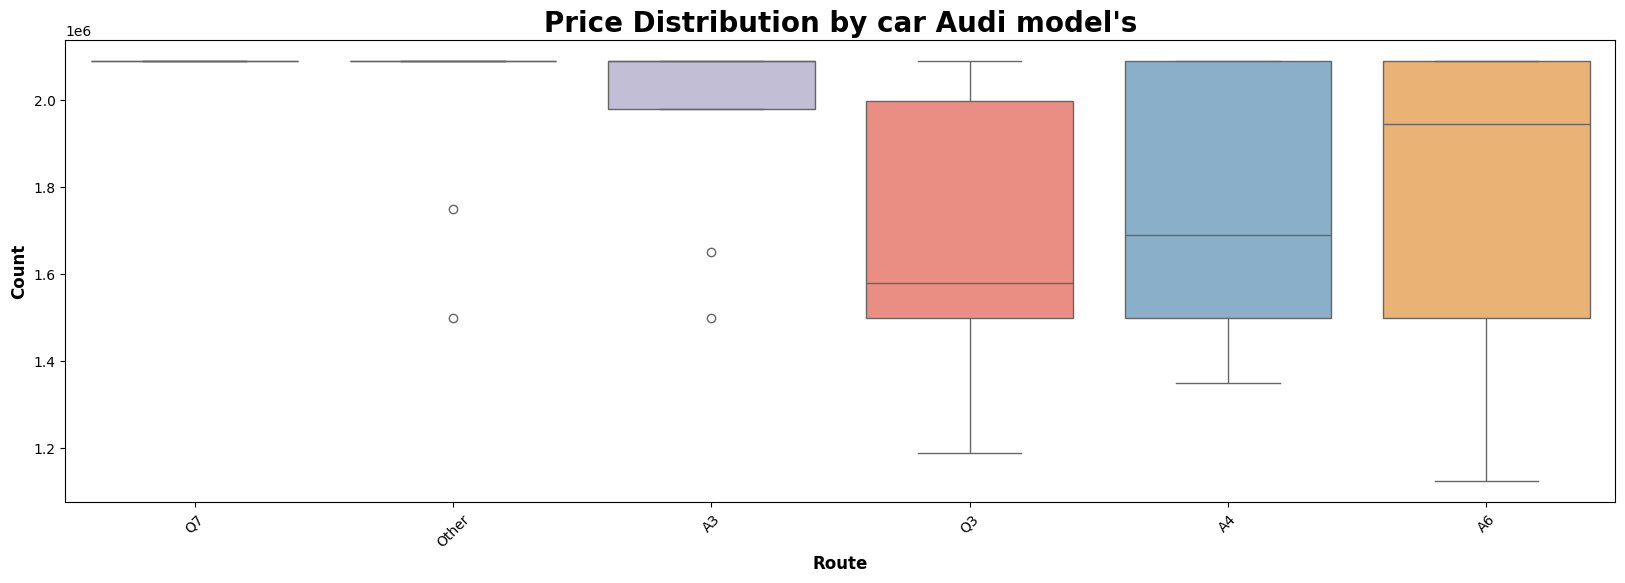

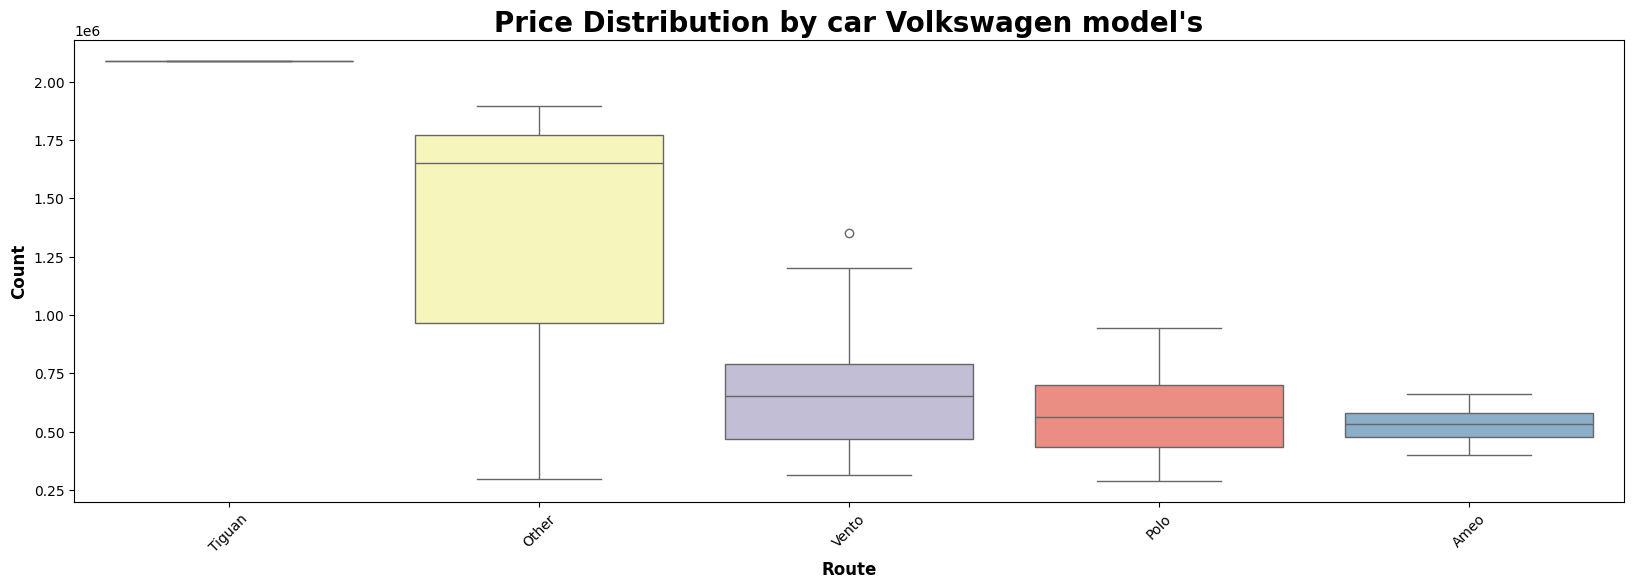

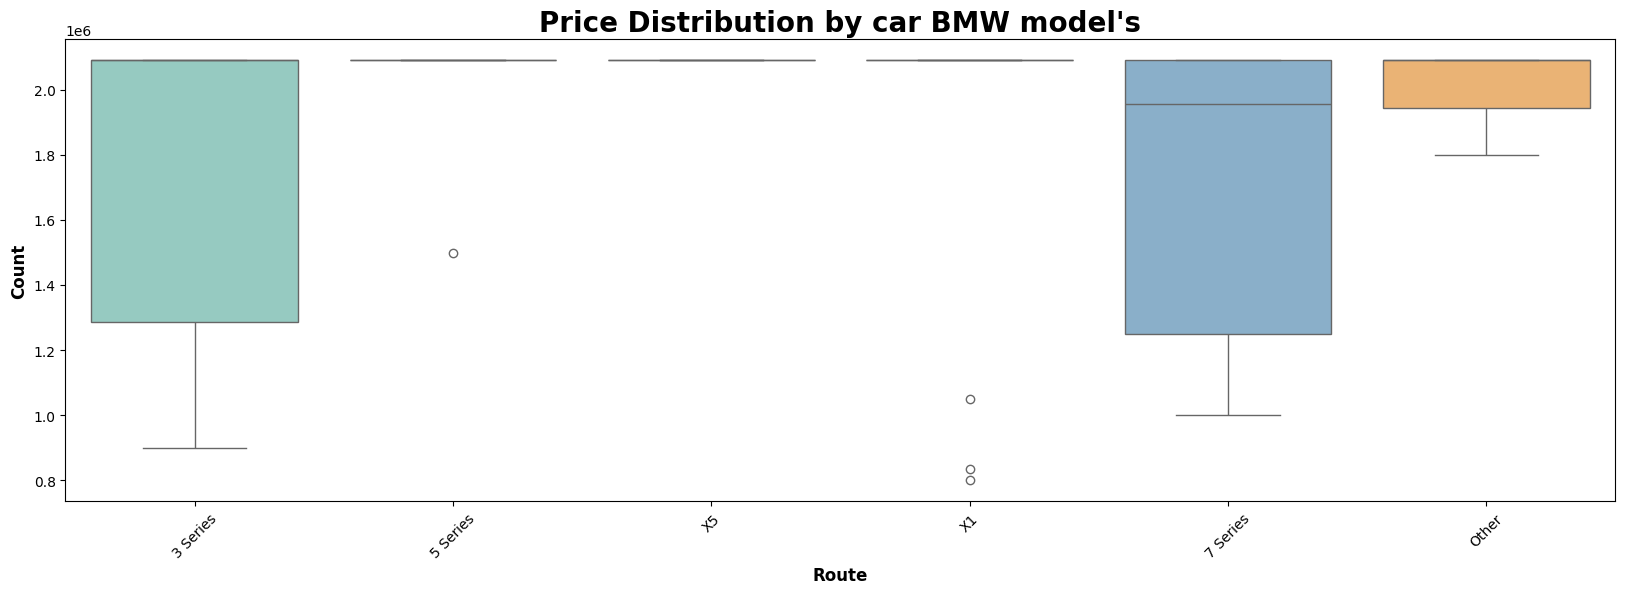

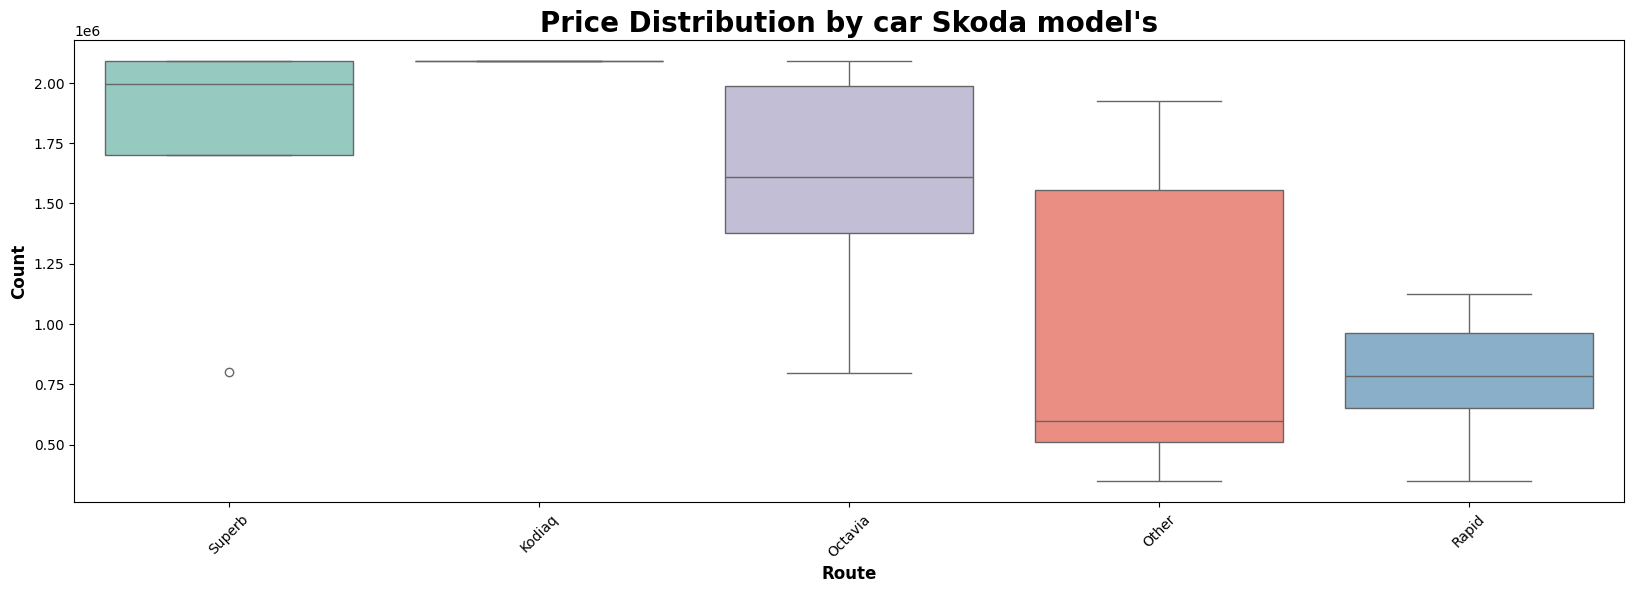

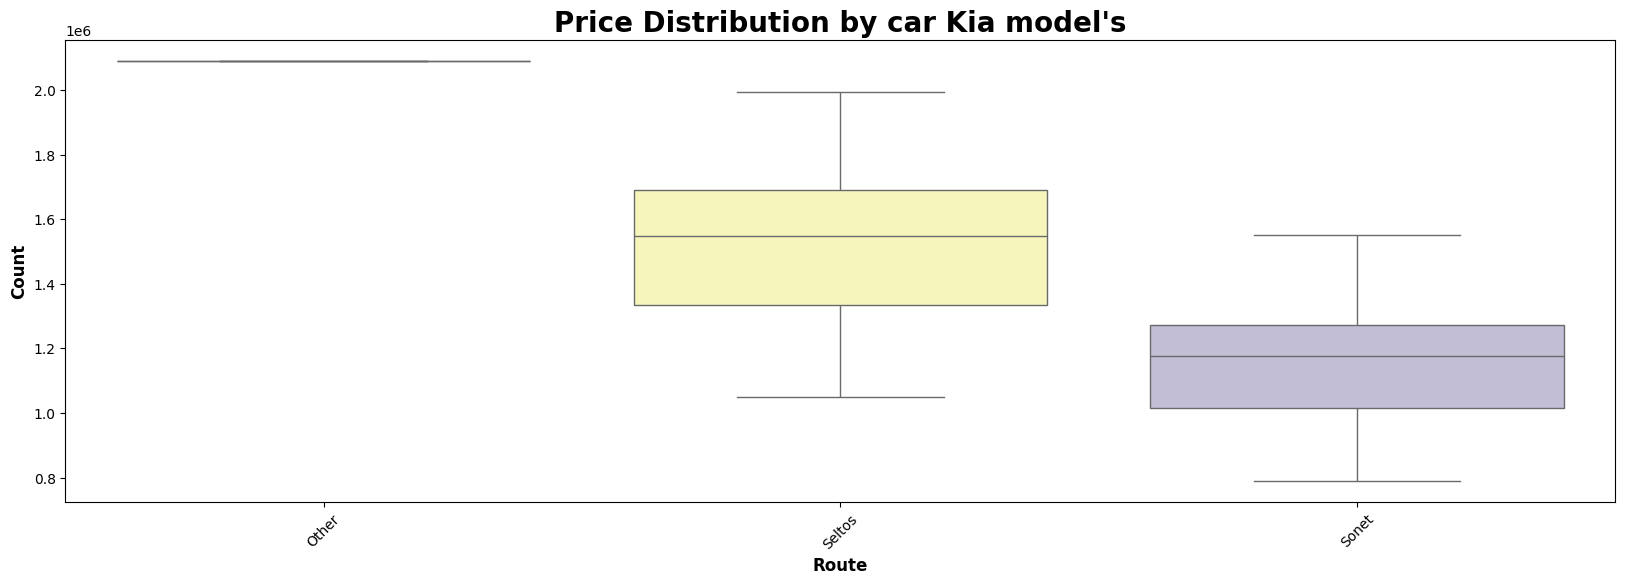

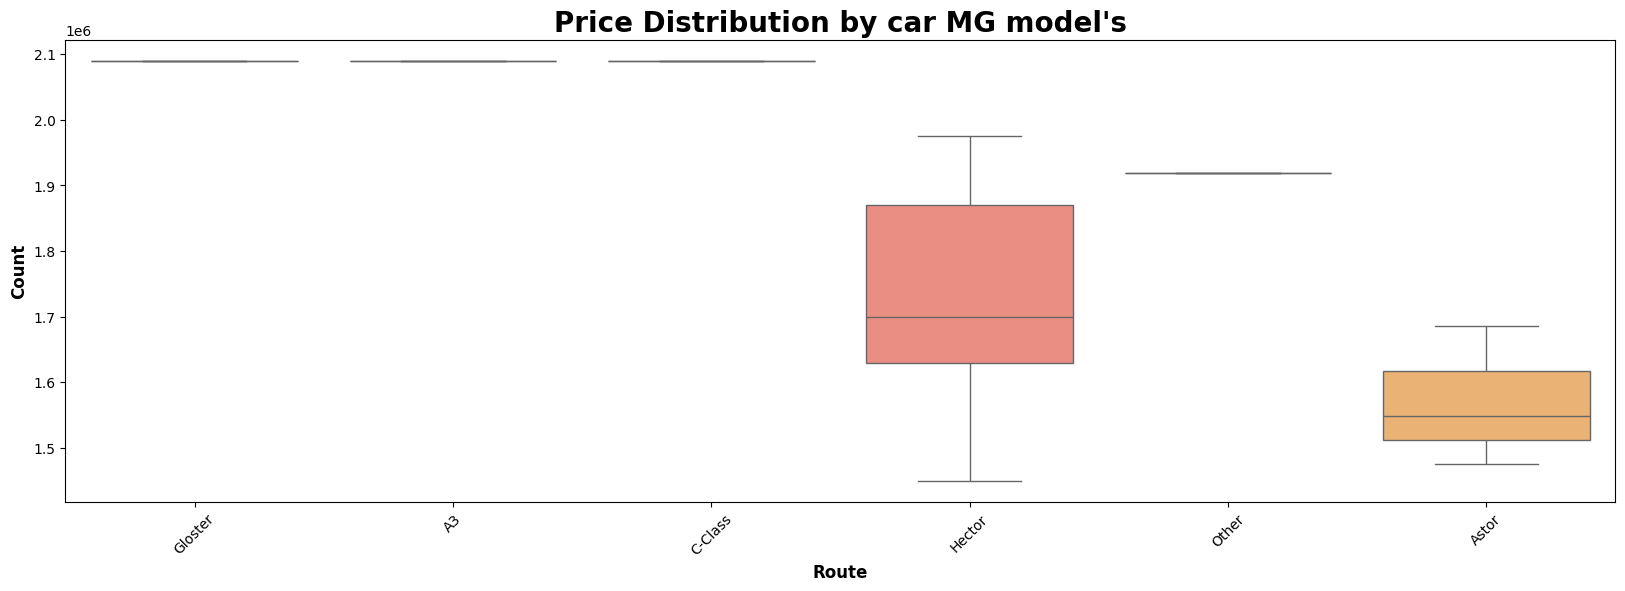

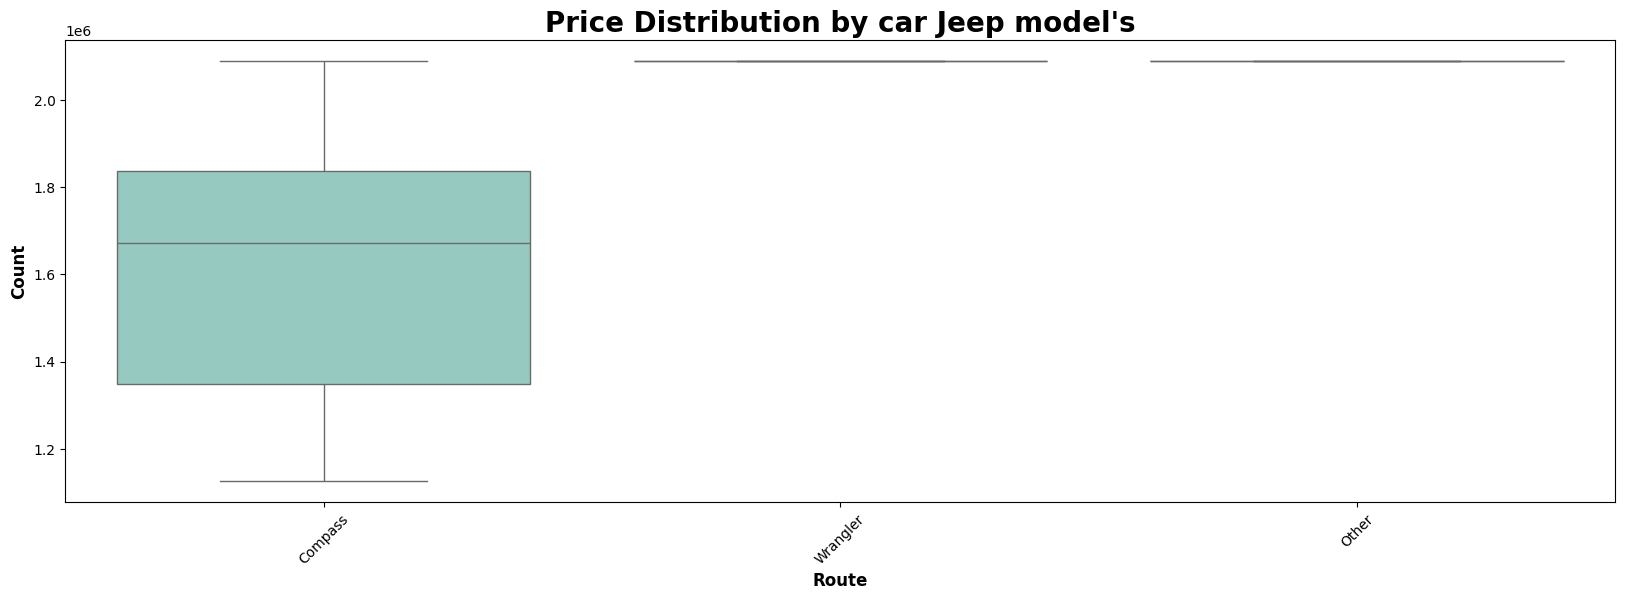

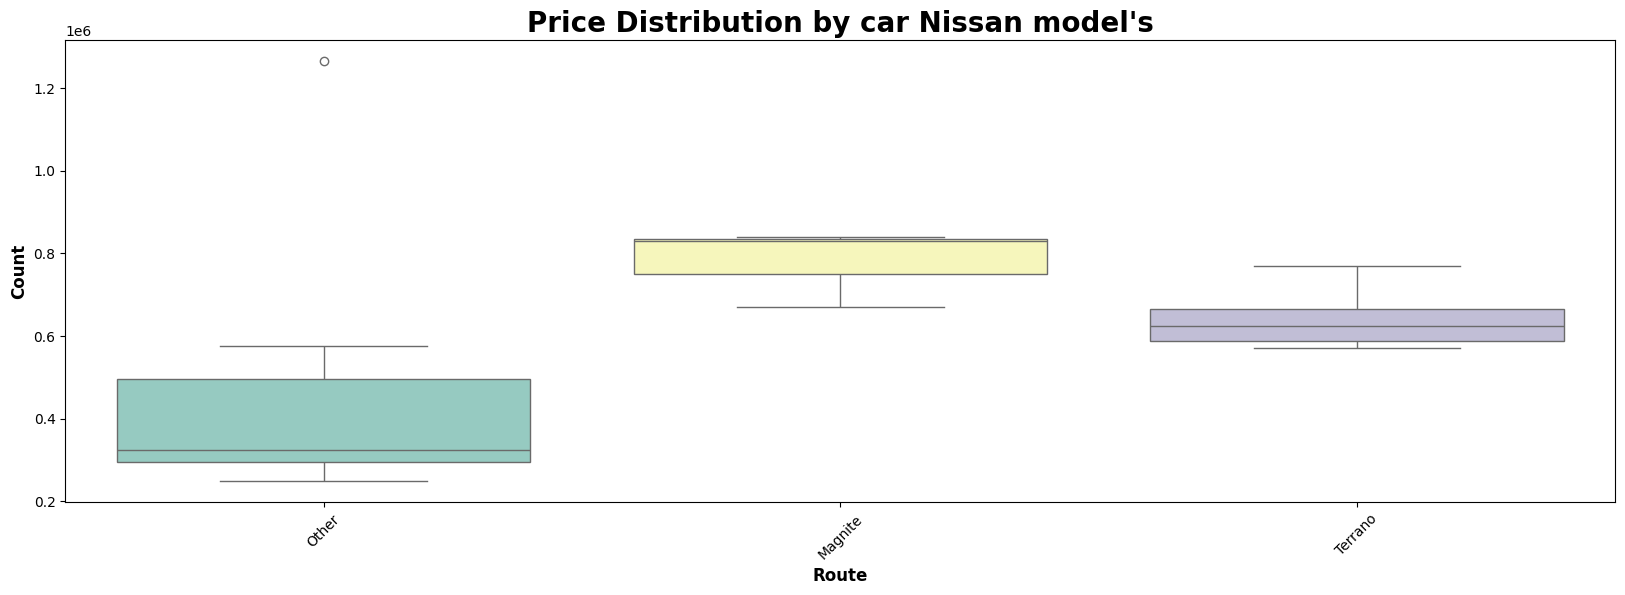

In [1601]:
for brand in brand_list:
    plt.figure(figsize=(20,6))
    sns.boxplot(df[df["brand"] == brand].sort_values("car_price_in_rupees",ascending=False),y="car_price_in_rupees",x ="model",palette="Set3")
    plt.xticks(rotation = 45)
    plt.title(f"Price Distribution by car {brand} model's",fontsize=20,fontweight="bold")
    plt.ylabel("Count",fontsize = 12,fontweight = "bold")
    plt.xlabel("Route",fontsize = 12,fontweight = "bold")
    plt.show()

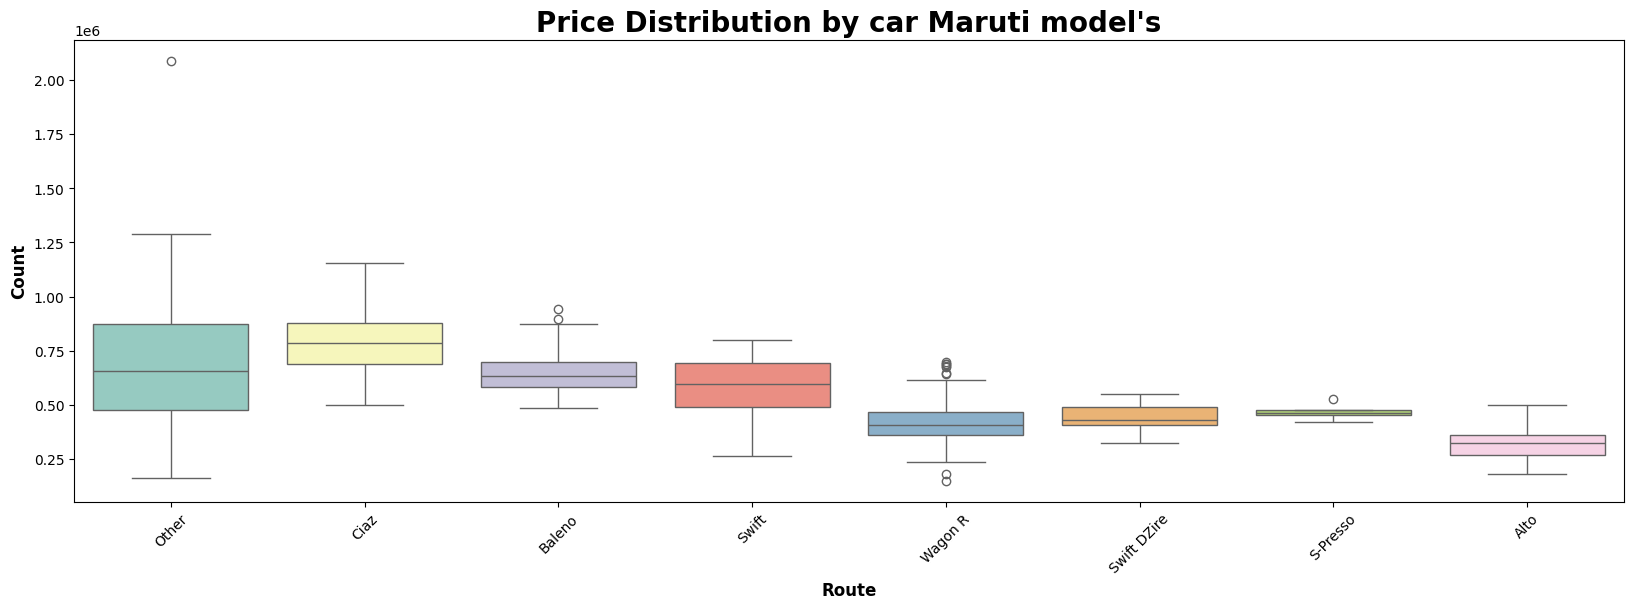

In [1602]:
# Checking the Price distribution by model

plt.figure(figsize=(20,6))
sns.boxplot(brand_maruti.sort_values("car_price_in_rupees",ascending=False),y="car_price_in_rupees",x ="model",palette="Set3")
plt.xticks(rotation = 45)
plt.title("Price Distribution by car Maruti model's",fontsize=20,fontweight="bold")
plt.ylabel("Count",fontsize = 12,fontweight = "bold")
plt.xlabel("Route",fontsize = 12,fontweight = "bold")
plt.show()

In [1603]:
df.sample()

,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,brand,model
1384,2090000.0,45700.0,Diesel,Ahmedabad,2020,BMW,5 Series


In [1604]:
df["city"].unique()

array(['Mumbai', 'Kolkata', 'Bangalore', 'Thane', 'Chennai', 'Ahmedabad',
       'Hyderabad', 'Pune', 'Gurgaon', 'Delhi', 'Noida', 'Faridabad',
       'Thiruvallur', 'Ambattur', 'Poonamallee', 'Pallikarnai'],
      dtype=object)

In [1605]:
df["brand"].unique()

array(['Hyundai', 'Maruti Suzuki', 'Tata', 'Jeep', 'Toyota', 'Renault',
       'Mercedes', 'Ford', 'Kia', 'BMW', 'Honda', 'Audi', 'MG', 'Skoda',
       'Volkswagen', 'Mahindra', 'Nissan'], dtype=object)

In [1606]:
df = df[df["model"] != 'Other']

In [1607]:
df["model"] = df["model"].str.strip()
df["brand"] = df["brand"].str.strip()

In [1608]:
df.sample(20)

,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,brand,model
1809,1875000.0,27000.0,Petrol,Mumbai,2019,Jeep,Compass
1233,200000.0,119658.5,Petrol + 1,Pallikarnai,2004,Toyota,Corolla
1019,1175000.0,36313.0,Petrol,Mumbai,2019,Hyundai,Creta
1394,409000.0,4441.0,Petrol,Kolkata,2019,Hyundai,Santro
1279,995000.0,20440.0,Petrol,Hyderabad,2019,Maruti Suzuki,Ciaz
1748,420000.0,86955.0,CNG,Pune,2018,Maruti Suzuki,Wagon R
569,395000.0,36000.0,Petrol,Thane,2013,Maruti Suzuki,Swift DZire
782,669000.0,44300.0,Petrol,Bangalore,2019,Hyundai,Grand i10
1763,1551000.0,24500.0,Diesel,Ahmedabad,2019,Tata,Harrier
1732,855000.0,39000.0,Petrol,Thane,2015,Hyundai,Creta


In [1609]:
df["year_of_manufacture"] = df["year_of_manufacture"].astype("object")

In [1610]:
df.city.unique()   # After trail and error city column is not required it affect the model performance

array(['Mumbai', 'Kolkata', 'Bangalore', 'Thane', 'Ahmedabad', 'Chennai',
       'Pune', 'Gurgaon', 'Delhi', 'Hyderabad', 'Noida', 'Faridabad',
       'Ambattur', 'Poonamallee', 'Pallikarnai', 'Thiruvallur'],
      dtype=object)

In [1611]:
df.dtypes

car_price_in_rupees    float64
kms_driven             float64
fuel_type               object
city                    object
year_of_manufacture     object
brand                   object
model                   object
dtype: object

In [1612]:
df = df[df['fuel_type'].isin(['Petrol', 'Diesel', 'CNG'])]

# ***Pre-Processing***

In [1613]:
df.sample()

,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,brand,model
1824,970000.0,48976.0,Diesel,Pune,2017,Hyundai,Creta


In [1614]:
# Split the data into features (X) and target (y)
X = df[['kms_driven', 'fuel_type','year_of_manufacture','brand','model']]
y = df['car_price_in_rupees']

In [1615]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1616]:
df.year_of_manufacture

0       2016
1       2019
2       2021
3       2016
4       2019
        ... 
2099    2014
2100    2015
2102    2018
2103    2017
2104    2017
Name: year_of_manufacture, Length: 1520, dtype: object

In [1617]:
df.sample()

,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,brand,model
1360,2090000.0,27000.0,Diesel,Bangalore,2019,Ford,Endeavour


In [1618]:
df.fuel_type.value_counts()

fuel_type
Petrol    1018
Diesel     448
CNG         54
Name: count, dtype: int64

In [1619]:
df.sample()

,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,brand,model
943,1190000.0,54517.0,Petrol,Ahmedabad,2019,Toyota,Corolla


In [1620]:
categorical_features = ['fuel_type']
ordinal_features = ['brand', 'model']

In [1621]:
# Assuming df is your DataFrame
cat_brand_order = df.groupby('brand')['car_price_in_rupees'].mean().sort_values(ascending=True).index.tolist()
cat_model_order = df.groupby('model')['car_price_in_rupees'].mean().sort_values(ascending=True).index.tolist()

In [1622]:
# Corrected ordinal categories
ordinal_categories = [
    cat_brand_order,  # Order for 'brand'
    cat_model_order   # Order for 'model'
]


In [1623]:
# Define the transformers for each type of feature
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False), categorical_features),  # One-hot encode the categorical features
        ('ordinal', OrdinalEncoder(categories=ordinal_categories), ordinal_features)  # Ordinal encode the ordinal features
    ], remainder="passthrough"
)

# ***MODEL SELECTION***

In [1624]:
# Define the models
lr = LinearRegression()
la = Lasso(random_state=42)
ri = Ridge(random_state=42)
dt = DecisionTreeRegressor(random_state=42)
xgb = XGBRegressor()
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
svr = SVR()



In [1625]:
# Add models to list
model_list = [lr, la, ri, dt, xgb, rf, gb,svr]
model_name = ["Linear Regression", "Lasso", "Ridge", "Decision Tree Regressor", "XGB Regressor", 
              "Random Forest Regressor", "Gradient Boosting Regressor","SVR"]

Model Name: Linear Regression
RMSE: 177220.6059, R2 Score: 0.9038, Adjusted R2 Score: 0.9022


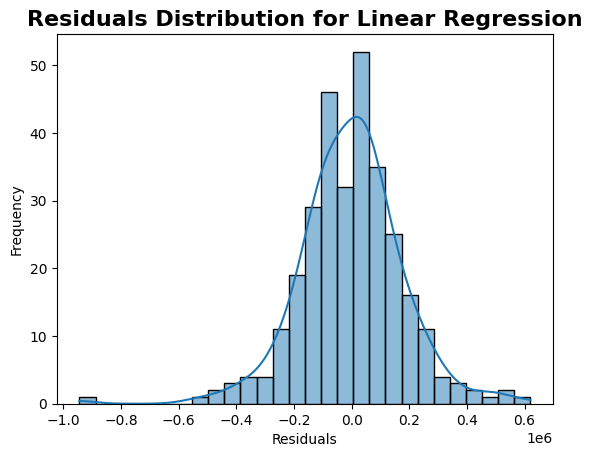

Model Name: Lasso
RMSE: 177220.8373, R2 Score: 0.9038, Adjusted R2 Score: 0.9022


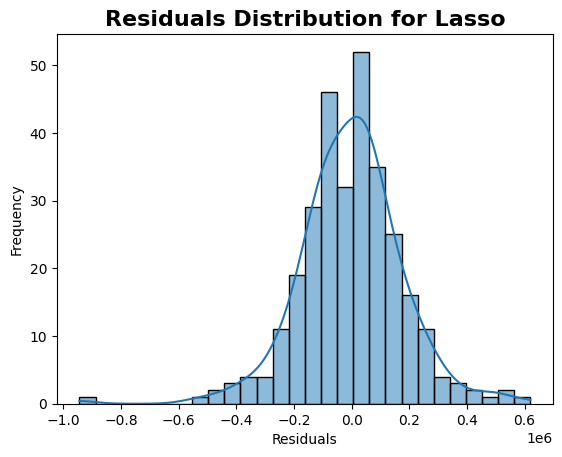

Model Name: Ridge
RMSE: 177221.0410, R2 Score: 0.9038, Adjusted R2 Score: 0.9022


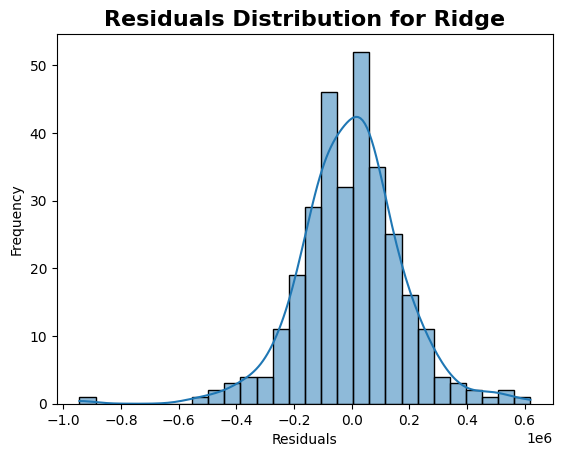

Model Name: Decision Tree Regressor
RMSE: 192544.0269, R2 Score: 0.8865, Adjusted R2 Score: 0.8846


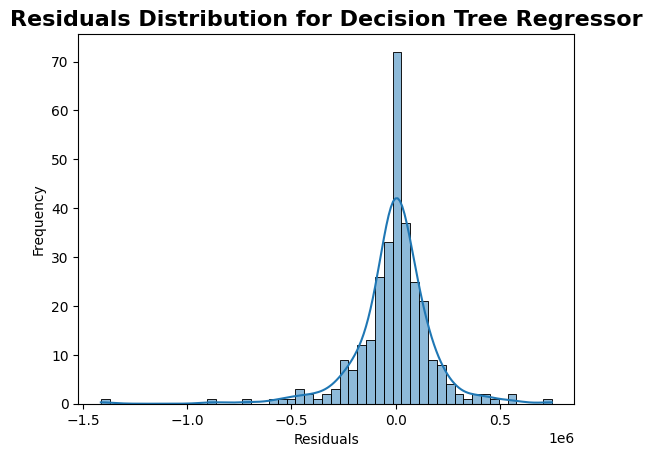

Model Name: XGB Regressor
RMSE: 148194.6052, R2 Score: 0.9328, Adjusted R2 Score: 0.9316


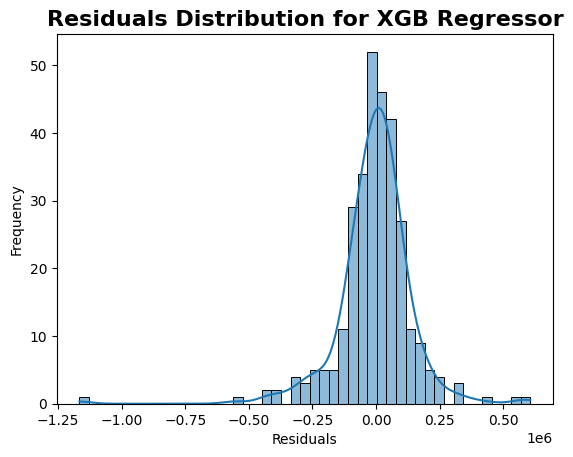

Model Name: Random Forest Regressor
RMSE: 152959.0938, R2 Score: 0.9284, Adjusted R2 Score: 0.9272


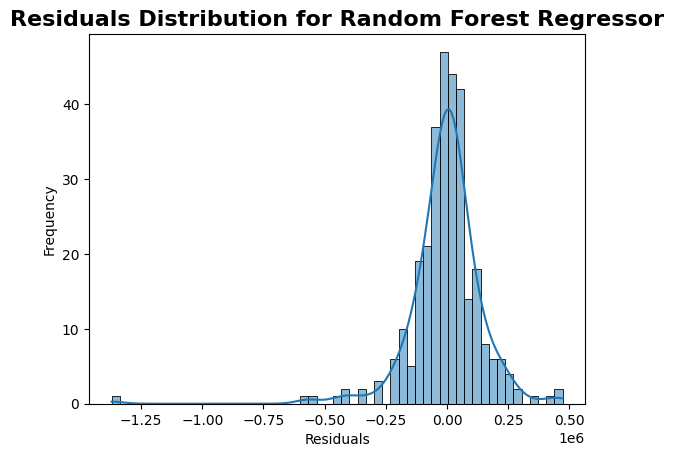

Model Name: Gradient Boosting Regressor
RMSE: 145095.6513, R2 Score: 0.9355, Adjusted R2 Score: 0.9345


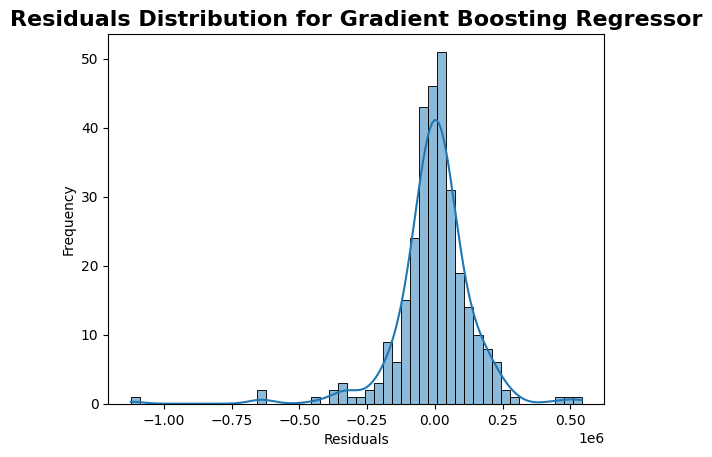

Model Name: SVR
RMSE: 607044.7225, R2 Score: -0.1284, Adjusted R2 Score: -0.1473


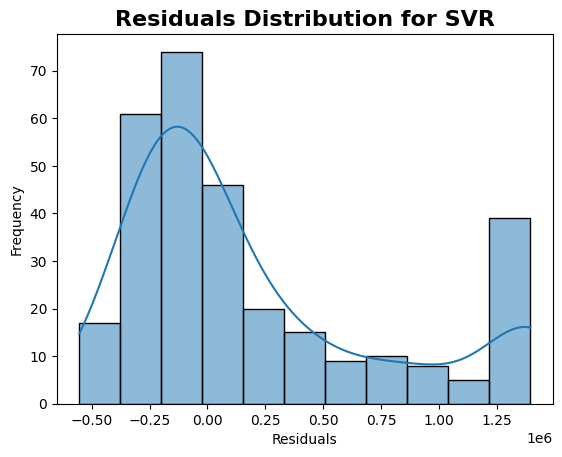

In [1626]:
# Loop through each model
for name, model in zip(model_name, model_list):
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    pipe.fit(X_train, y_train)

    # Make predictions
    y_pred = pipe.predict(X_test)

    # Calculate metrics
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))  
    n = len(y_test)  
    p = X_train.shape[1]  
    r2 = r2_score(y_test, y_pred)  
    adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

    # Print the model results
    print(f"Model Name: {name}")
    print(f"RMSE: {RMSE:.4f}, R2 Score: {r2:.4f}, Adjusted R2 Score: {adjusted_r2:.4f}")

    # Plot the residuals
    residuals = y_test - y_pred
    sns.histplot(residuals, kde=True)
    plt.title(f"Residuals Distribution for {name}", fontsize=16, fontweight='bold')
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()

In [1627]:
pipe = Pipeline(steps=[("preprocessor",preprocessor),("model",GradientBoostingRegressor())])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_pred,y_test))
n = len(y_test)
p = 15
r2 = r2_score(y_pred,y_test)
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print(f"Model_Name = {name},  RMSE = {RMSE},  R2_Score = {r2}, Adjusted_R2_Score = {adjusted_r2}")

Model_Name = SVR,  RMSE = 145094.9534630376,  R2_Score = 0.9330961457066047, Adjusted_R2_Score = 0.929611569962157


In [1631]:
# Loop through each model
for name, model in zip(model_name, model_list):
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    
    # Apply cross-validation with multiple metrics
    cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring=('neg_mean_squared_error', 'r2'), return_train_score=False)
    
    # Calculate RMSE
    rmse_scores = np.sqrt(-cv_results['test_neg_mean_squared_error'])  
    
    # Print the model results
    print(f"Model Name: {name}")
    print(f"Cross-Validation RMSE: {rmse_scores}")
    print(f"Mean RMSE: {rmse_scores.mean():.4f}, Std RMSE: {rmse_scores.std():.4f}")
    print(f"Mean R²: {cv_results['test_r2'].mean():.4f}, Std R²: {cv_results['test_r2'].std():.4f}")
    print("-" * 50)


Model Name: Linear Regression
Cross-Validation RMSE: [204438.68651907 188346.71815824 202519.54211129 204358.91872416
 181664.32427741]
Mean RMSE: 196265.6380, Std RMSE: 9458.5293
Mean R²: 0.8773, Std R²: 0.0133
--------------------------------------------------
Model Name: Lasso
Cross-Validation RMSE: [204438.90304817 188347.00621318 202519.49930878 204358.46327671
 181664.31389505]
Mean RMSE: 196265.6371, Std RMSE: 9458.4381
Mean R²: 0.8773, Std R²: 0.0133
--------------------------------------------------
Model Name: Ridge
Cross-Validation RMSE: [204451.21048012 188357.87015847 202507.64494321 204347.89201085
 181653.40204969]
Mean RMSE: 196263.6039, Std RMSE: 9458.7450
Mean R²: 0.8773, Std R²: 0.0133
--------------------------------------------------
Model Name: Decision Tree Regressor
Cross-Validation RMSE: [170990.45187129 192673.51220271 220607.26140816 186632.36016319
 208360.68956195]
Mean RMSE: 195852.8550, Std RMSE: 17219.1254
Mean R²: 0.8760, Std R²: 0.0263
----------------

In [1636]:

# Define the GradientBoostingRegressor model
gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid for tuning GradientBoostingRegressor
param_grid = {
    'model__n_estimators': [100, 200, 300],        # Number of boosting stages
    'model__learning_rate': [0.01, 0.1, 0.2],      # Step size for gradient descent
    'model__max_depth': [3, 5, 7],                 # Maximum depth of individual trees
    'model__subsample': [0.7, 0.8, 1.0],           # Fraction of samples used for fitting individual trees
    'model__min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'model__min_samples_leaf': [1, 2, 4],          # Minimum samples required to be at a leaf node
    'model__max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider when looking for the best split
}

# Create a pipeline that includes the preprocessor and GradientBoostingRegressor
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),   # Your preprocessor pipeline (as defined earlier)
    ('model', gbr)
])

# Set up GridSearchCV with the pipeline and the parameter grid
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)  # Convert the negative MSE score to RMSE

print("Best Parameters:", best_params)
print("Best CV RMSE:", best_score)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R²: {r2_test:.4f}")

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


KeyboardInterrupt: 

# ***Training and dumping the Model***

In [1637]:
gbr = GradientBoostingRegressor(
    learning_rate=0.2,
    max_depth=3,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    subsample=1.0,
    random_state=42  
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),   
    ('model', gbr)
])


In [1638]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['fuel_type']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Maruti '
                                                                              'Suzuki',
                                                                              'Renault',
                                                                              'Nissan',
                                                                              'Honda',
                                                                              'Hyundai',
                                                                              'Volkswagen',
                                                                              'Ford',
                                                                              'Mahindra',
                                                                              'Tata',
                                                                              'Skoda',
                                                                              'Kia',
                                                                              'Toyota',
                                                                              'Jeep',
                                                                              'Audi',
                                                                              'Mercedes',
                                                                              'MG',
                                                                              'BMW'],
                                                                             ['Eon',
                                                                              'Alt...
                                                                              'Swift '
                                                                              'DZire',
                                                                              'S-Presso',
                                                                              'Santro',
                                                                              'Grand '
                                                                              'i10',
                                                                              'Ameo',
                                                                              'Tiago',
                                                                              'Amaze',
                                                                              'Aspire',
                                                                              'Polo',
                                                                              'Swift',
                                                                              'TUV300',
                                                                              'Jazz',
                                                                              'Terrano',
                                                                              'Baleno',
                                                                              'Elite '
                                                                              'i20',
                                                                              'Vento',
                                                                              'Triber',
                                                                              'EcoSport',
                                                       

In [1639]:
model.score(X_train,y_train)

0.97201571341821

In [1641]:
from joblib import dump

dump(model,'dump_model/model.joblib')

['dump_model/model.joblib']

In [1663]:
df.sample()

,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,brand,model
1627,980000.0,41443.0,Diesel,Hyderabad,2019,Skoda,Rapid


In [1677]:
df.fuel_type.value_counts().index.sort_values(ascending=False)

Index(['Petrol', 'Diesel', 'CNG'], dtype='object', name='fuel_type')

In [1664]:
df.sample()

,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,brand,model
725,745000.0,26438.0,Petrol,Thane,2019,Tata,Nexon


In [1678]:
columns = ['kms_driven', 'fuel_type', 'year_of_manufacture', 'brand', 'model']

In [1679]:
X_pred = pd.DataFrame([[26438.0, "Petrol", 2019, "Tata", "Nexon"]], columns=columns)

In [1680]:
round(model.predict(X_pred)[0],2)

892375.97